<a href="https://colab.research.google.com/github/cuongtring25/ChurnPrediction/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**văn bản in đậm**

In [ ]:
!pip install xgboost
!pip install imbalanced-learn
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler,SMOTE,SVMSMOTE
import category_encoders as ce
from sklearn.metrics import confusion_matrix

Data reading

In [ ]:
df = pd.read_excel('/content/SkilioMall.xlsx')

In [ ]:
df

,user_id,age,country,city,reg_days,marketing_source,sessions_30d,sessions_90d,avg_session_duration_90d,median_pages_viewed_30d,...,support_tickets_2024,avg_csat_2024,emails_open_rate_90d,emails_click_rate_90d,review_count_2024,avg_review_stars_2024,rfm_recency,rfm_frequency,rfm_monetary,churn_label
0,U40809,31,Vietnam,Hanoi,261,organic,9,26,883.11,10.43,...,0,4.38,0.865,0.162,10,4.39,40,35,2218.36,0
1,U44697,33,Philippines,Davao,810,ads_fb,19,52,1244.50,7.07,...,2,4.23,0.518,0.058,6,4.22,0,39,1920.78,0
2,U02960,28,Vietnam,Ho Chi Minh City,148,organic,15,34,779.69,6.77,...,0,4.06,0.610,0.092,1,4.96,44,25,1638.85,0
3,U04535,27,Thailand,Bangkok,868,organic,16,52,1182.89,9.86,...,1,3.79,0.400,0.090,3,4.31,32,31,1613.11,0
4,U35146,33,Malaysia,Kuala Lumpur,437,organic,6,20,900.40,7.88,...,0,4.13,0.209,0.030,3,4.15,48,17,1601.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U08338,29,Philippines,Manila,365,organic,0,3,592.33,1.68,...,0,3.50,0.236,0.110,1,3.89,69,0,0.00,1
49996,U48800,31,Malaysia,Johor Bahru,202,organic,0,0,753.26,6.41,...,0,3.43,0.231,0.023,1,4.27,56,0,0.00,1
49997,U12279,31,Philippines,Cebu,296,ads_ig,2,4,919.59,5.73,...,1,3.42,0.073,0.021,0,4.20,70,0,0.00,1
49998,U46203,22,Indonesia,Jakarta,394,ads_ig,1,1,447.55,2.44,...,4,3.40,0.507,0.136,0,4.85,54,0,0.00,1


**EDAE(xploratory data analysis)**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   50000 non-null  object 
 1   age                       50000 non-null  int64  
 2   country                   50000 non-null  object 
 3   city                      50000 non-null  object 
 4   reg_days                  50000 non-null  int64  
 5   marketing_source          50000 non-null  object 
 6   sessions_30d              50000 non-null  int64  
 7   sessions_90d              50000 non-null  int64  
 8   avg_session_duration_90d  50000 non-null  float64
 9   median_pages_viewed_30d   50000 non-null  float64
 10  search_queries_30d        50000 non-null  int64  
 11  device_mix_ratio          50000 non-null  float64
 12  app_version_major         50000 non-null  object 
 13  orders_30d                50000 non-null  int64  
 14  orders

In [ ]:
df.isnull().sum()

,0
user_id,0
age,0
country,0
city,0
reg_days,0
marketing_source,0
sessions_30d,0
sessions_90d,0
avg_session_duration_90d,0
median_pages_viewed_30d,0


In [ ]:
obj_cols = [f for f in df.columns if df[f].dtype == 'object']
obj_cols.remove('user_id')
print(obj_cols)

['country', 'city', 'marketing_source', 'app_version_major']


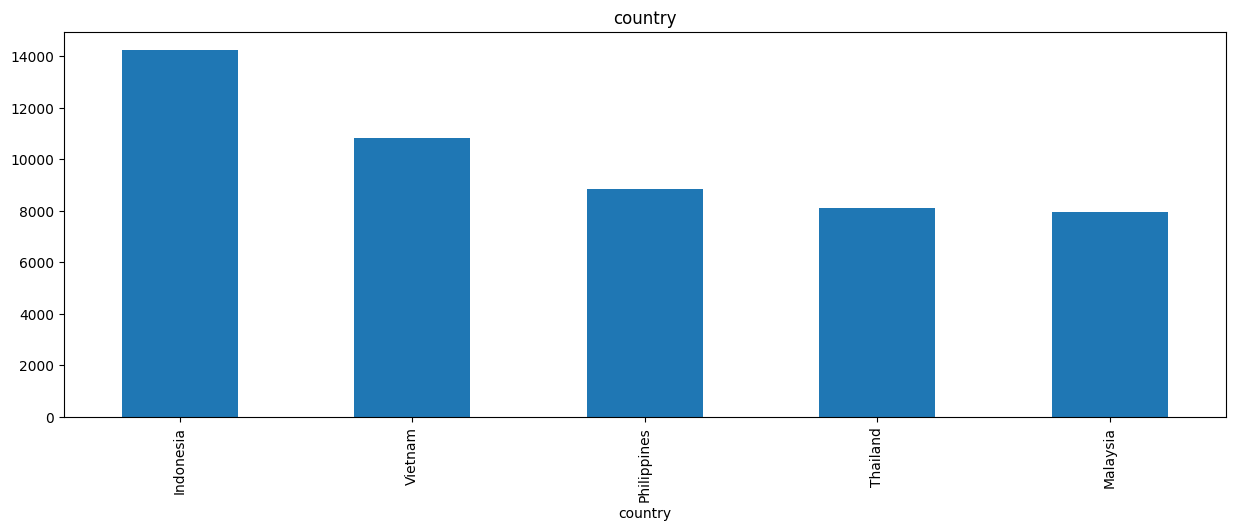

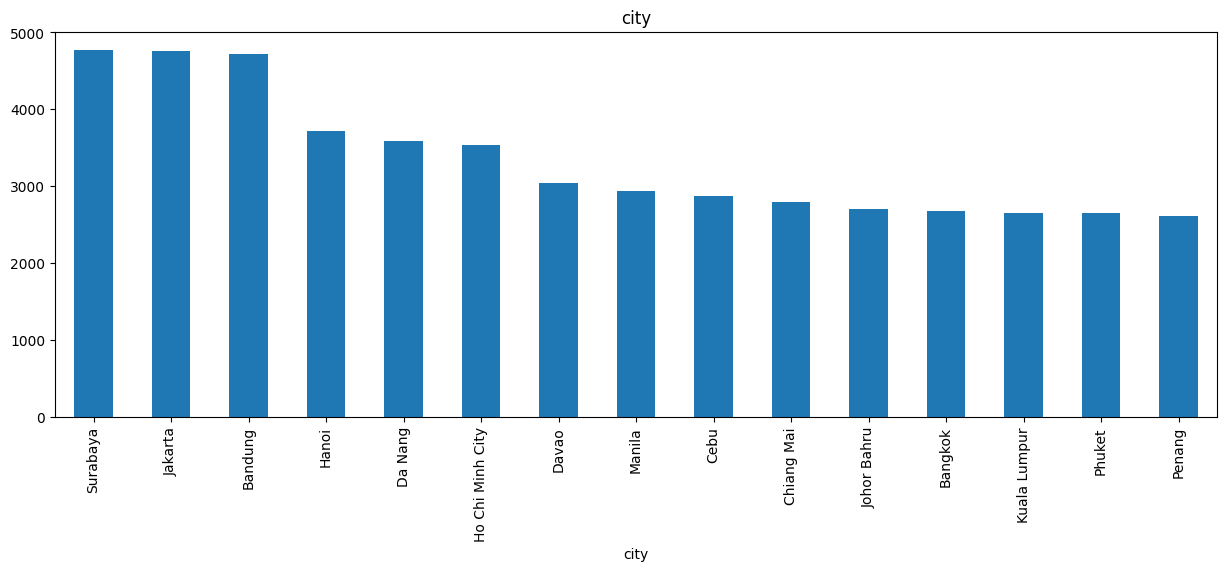

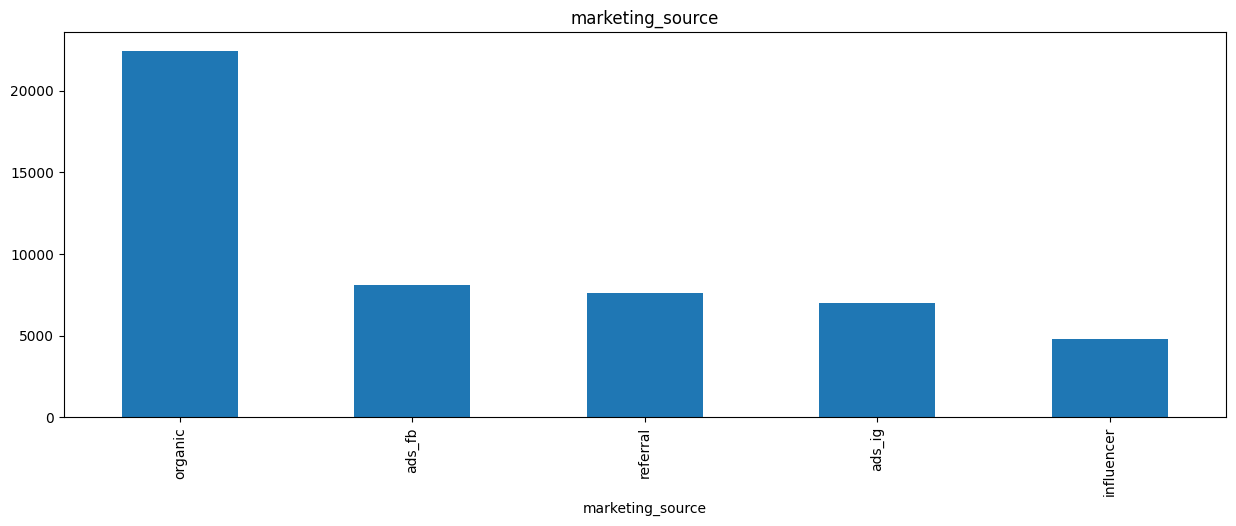

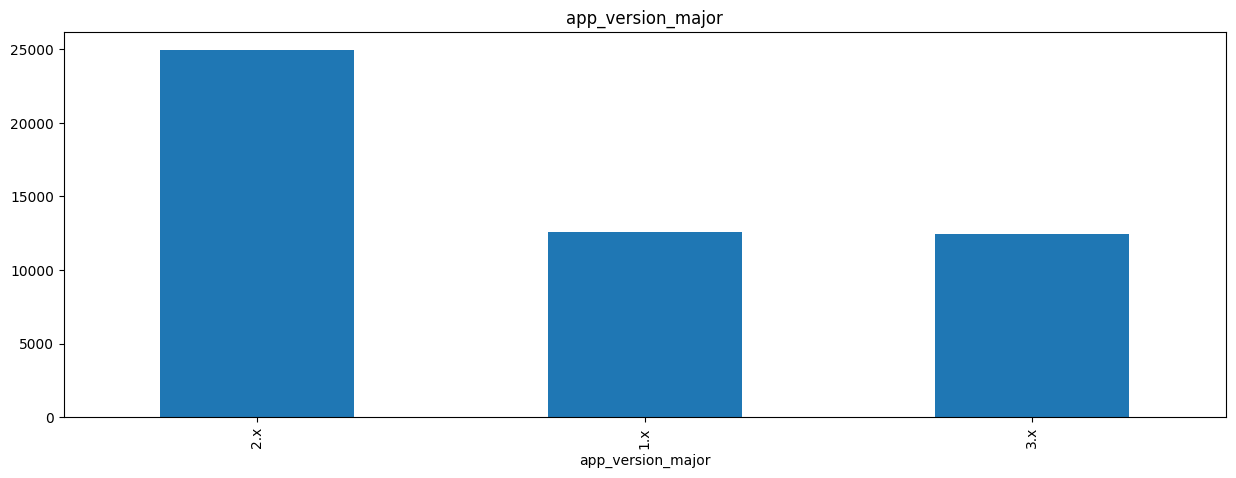

In [ ]:
for col in obj_cols:
  df[col].value_counts().plot(kind='bar',figsize=[15,5])
  plt.title(col)
  plt.show()

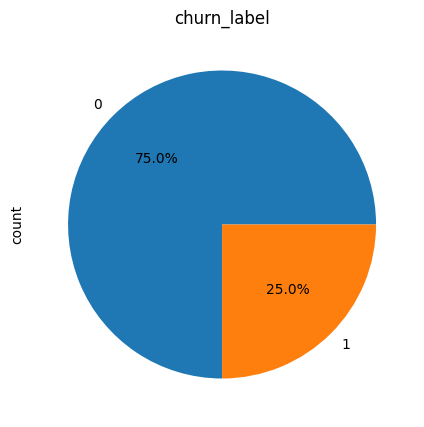

In [ ]:
df['churn_label'].value_counts().plot(kind='pie',figsize=[15,5],autopct='%1.1f%%')
plt.title('churn_label')
plt.show()

In [ ]:
numerics_cols = [f for f in df.columns if df[f].dtype != 'object']
numerics_cols.remove('churn_label')
print(numerics_cols)

['age', 'reg_days', 'sessions_30d', 'sessions_90d', 'avg_session_duration_90d', 'median_pages_viewed_30d', 'search_queries_30d', 'device_mix_ratio', 'orders_30d', 'orders_90d', 'orders_2024', 'aov_2024', 'gmv_2024', 'category_diversity_2024', 'days_since_last_order', 'discount_rate_2024', 'refunds_count_2024', 'refund_rate_2024', 'support_tickets_2024', 'avg_csat_2024', 'emails_open_rate_90d', 'emails_click_rate_90d', 'review_count_2024', 'avg_review_stars_2024', 'rfm_recency', 'rfm_frequency', 'rfm_monetary']


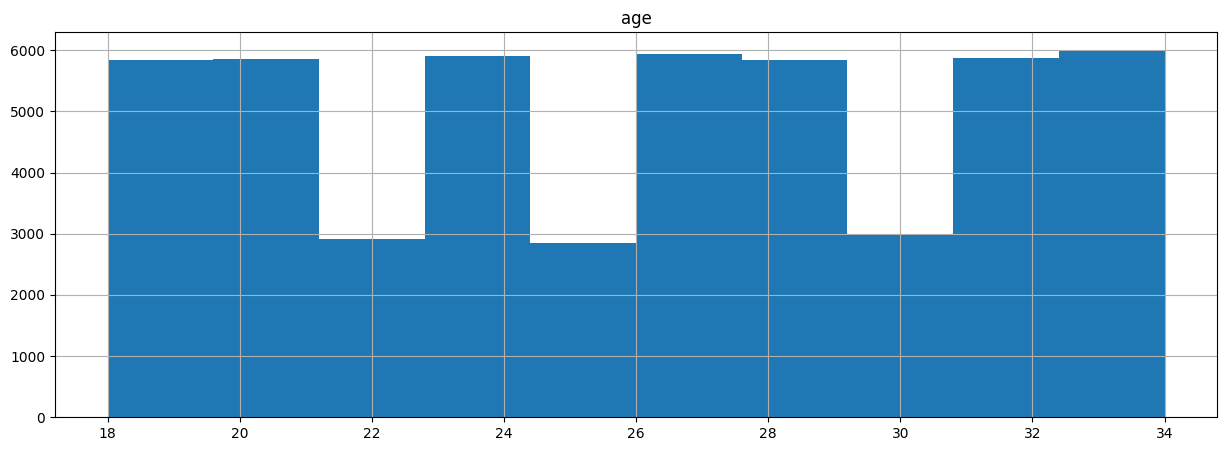

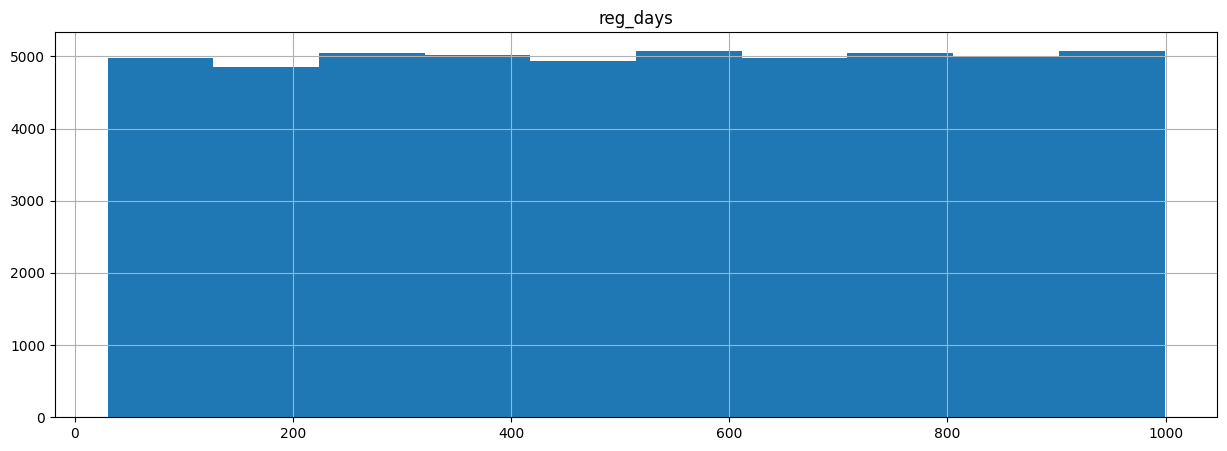

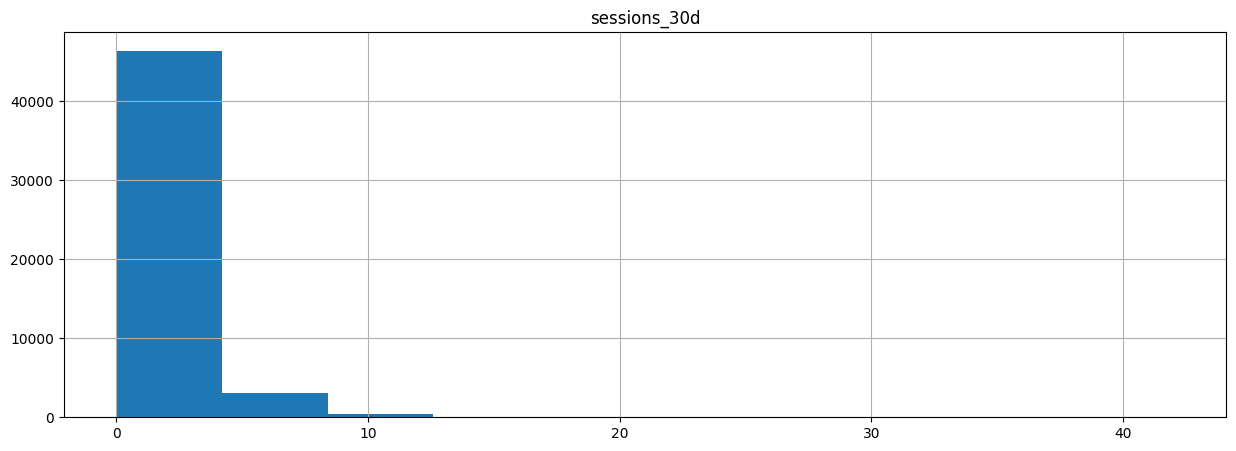

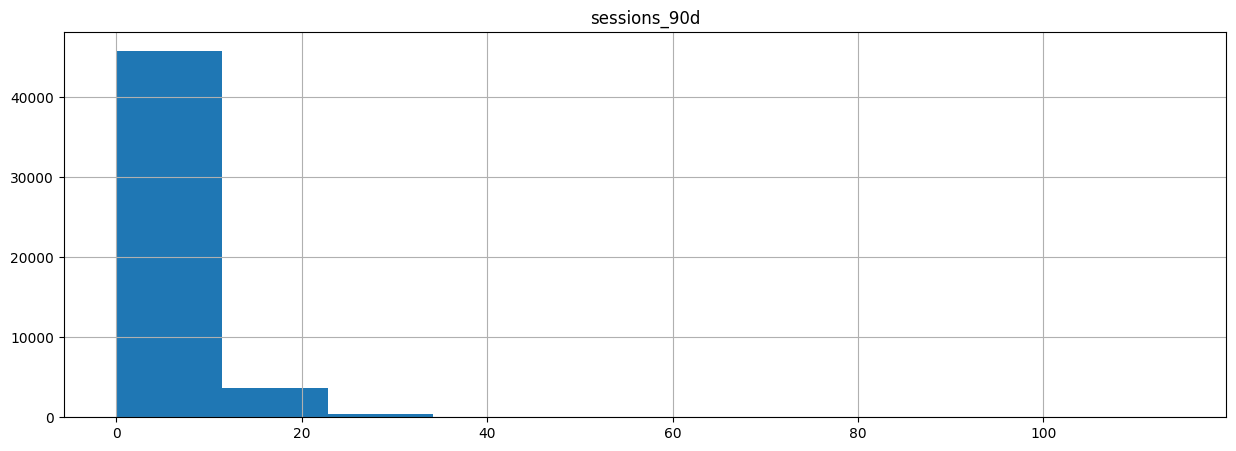

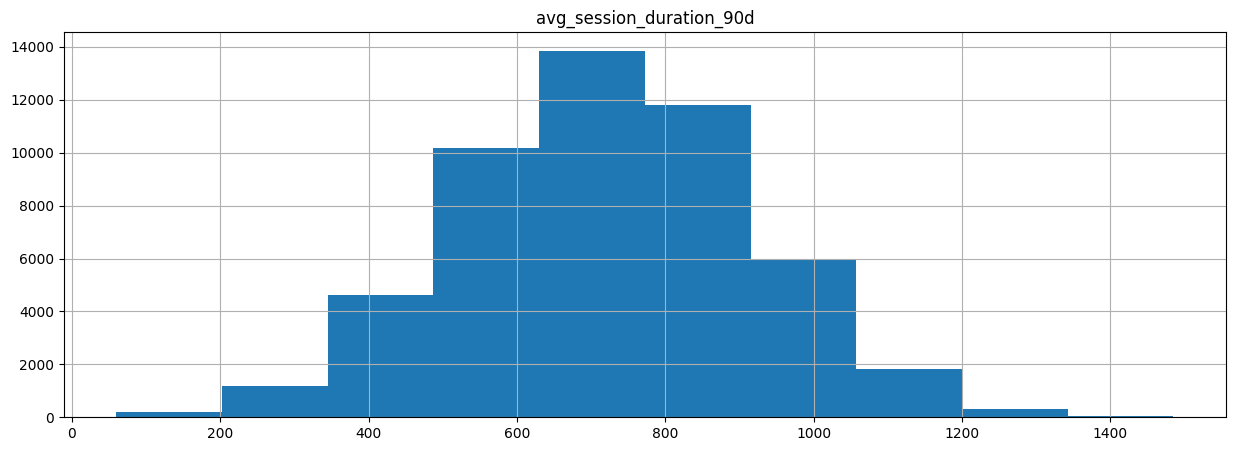

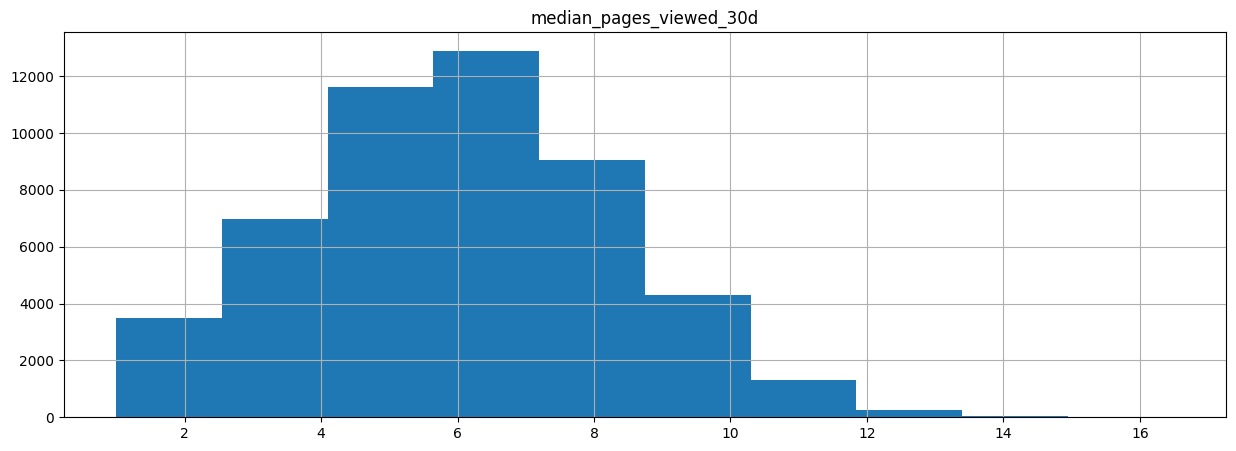

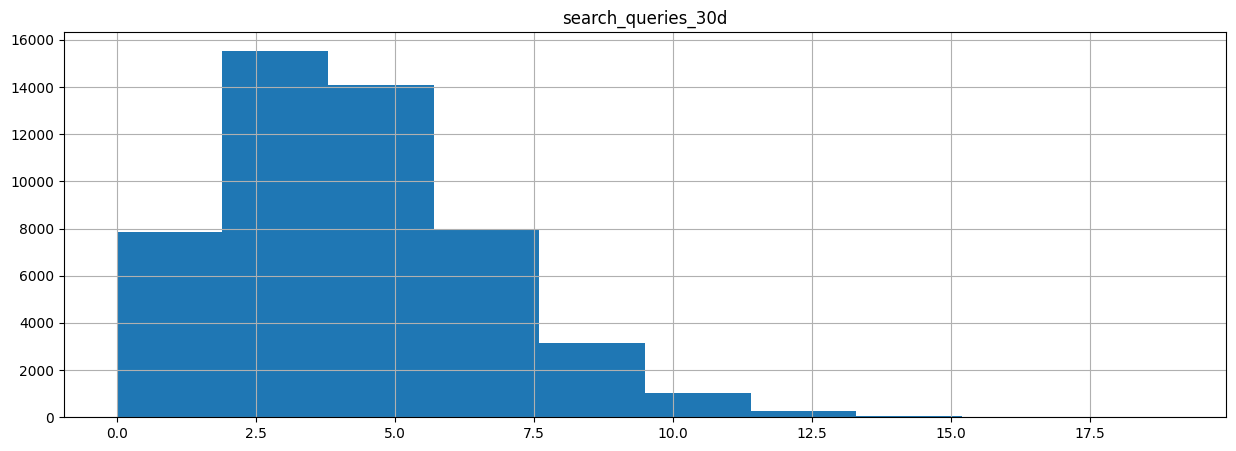

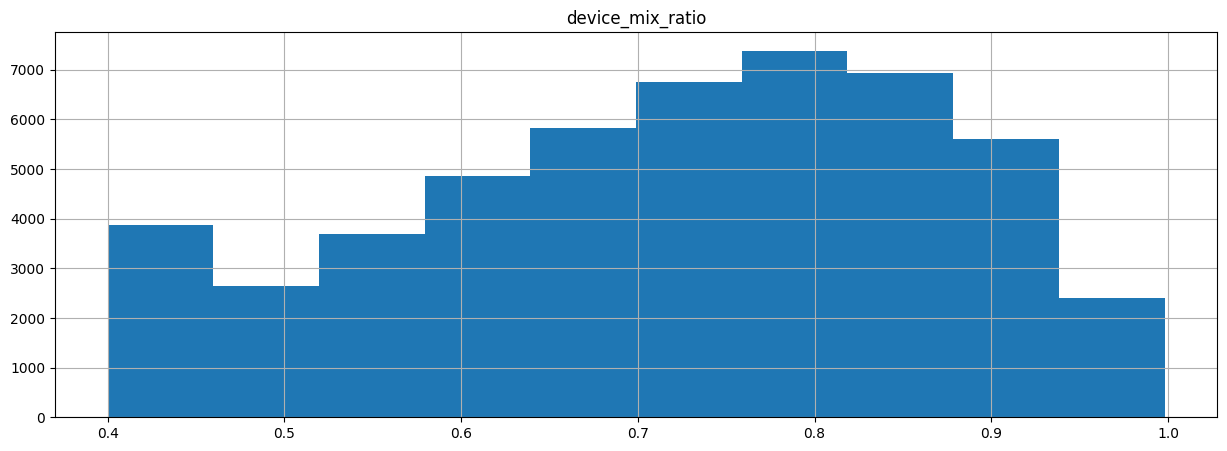

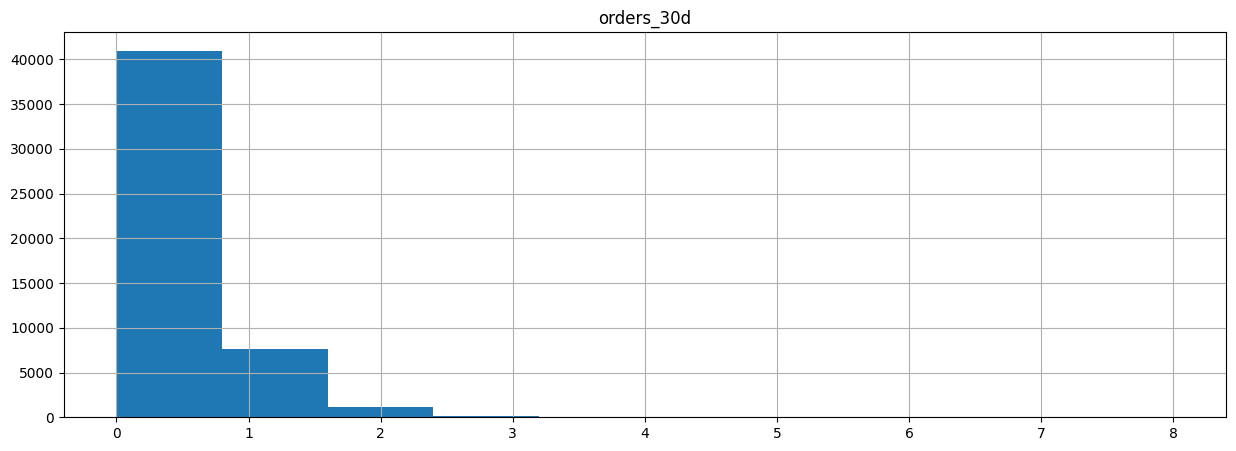

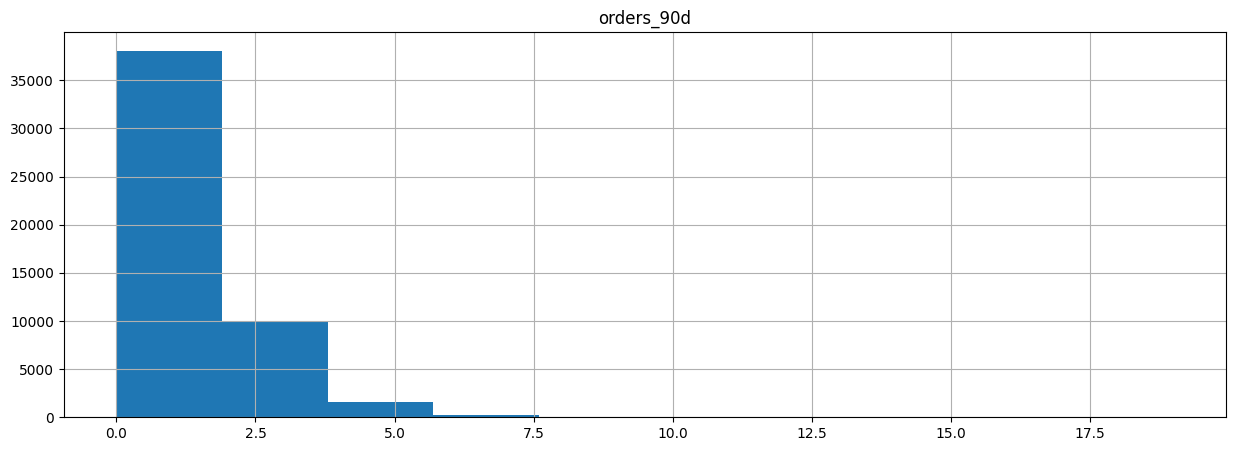

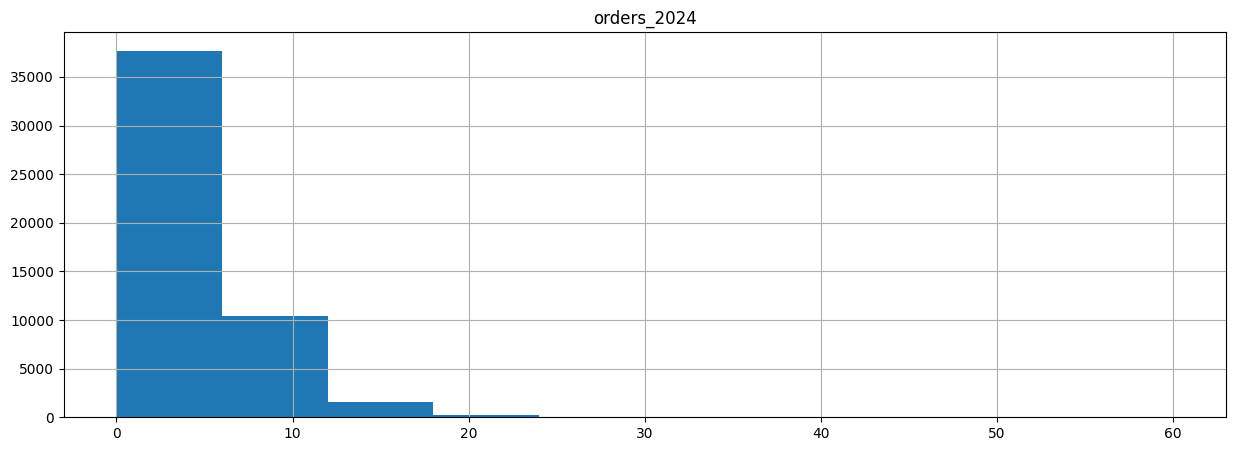

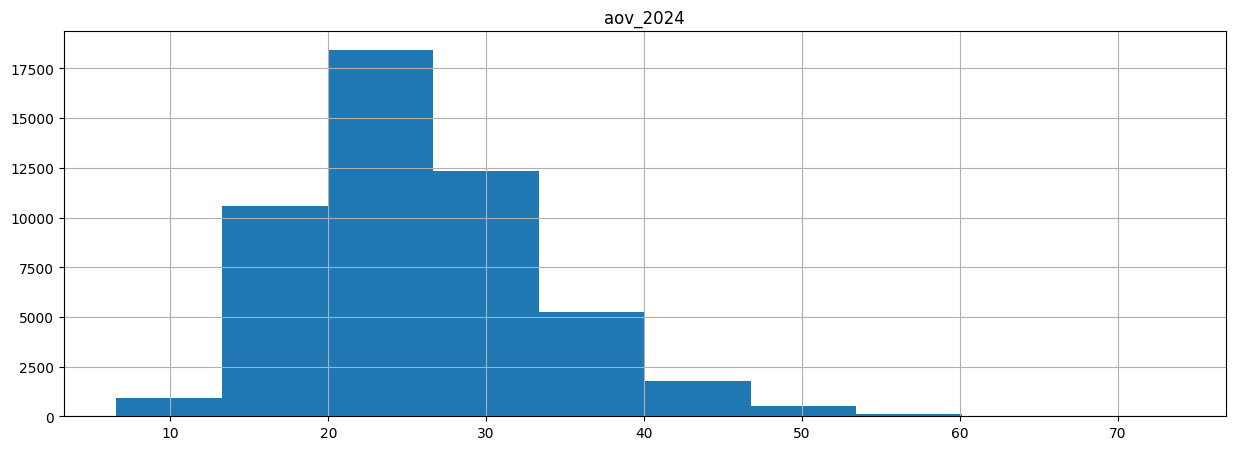

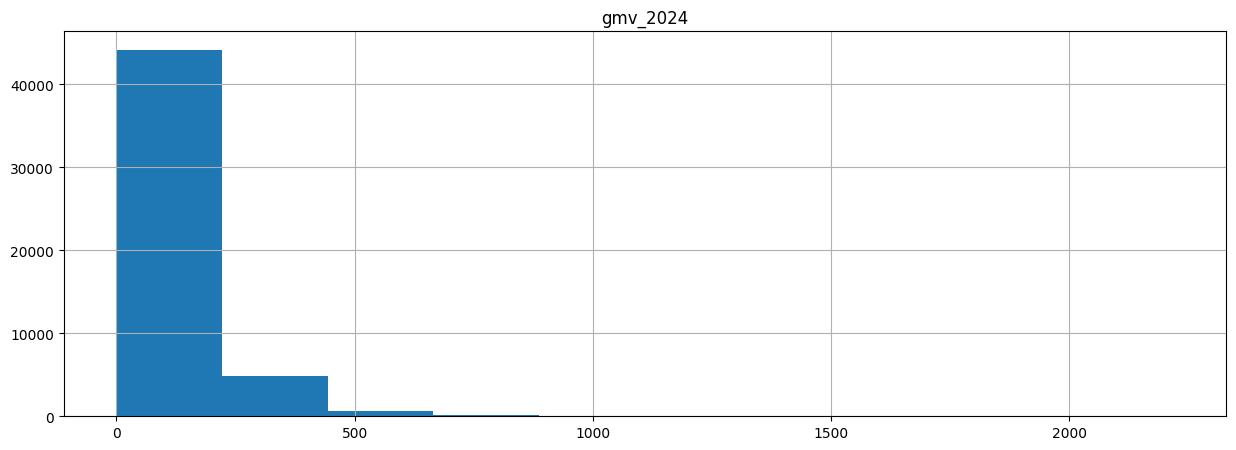

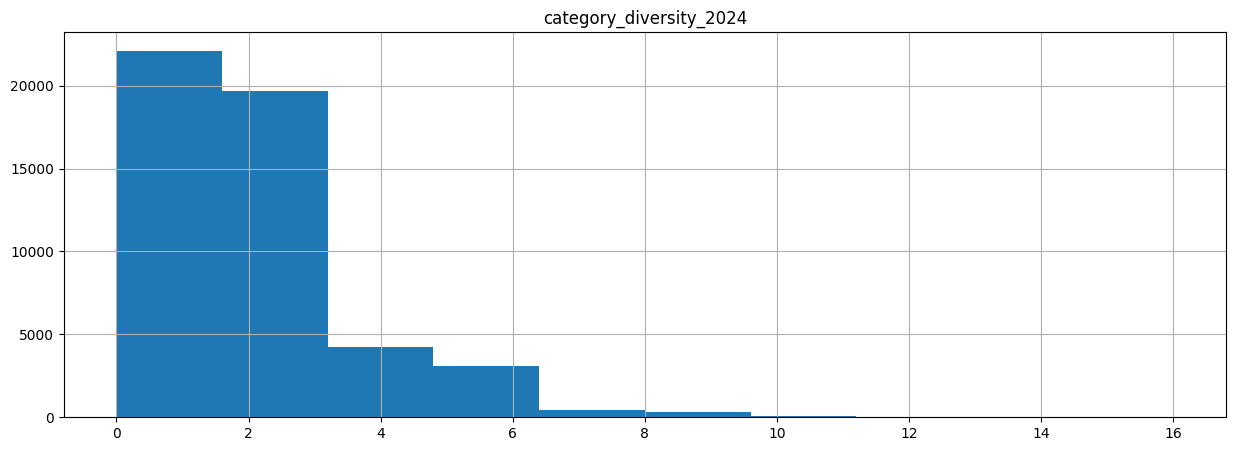

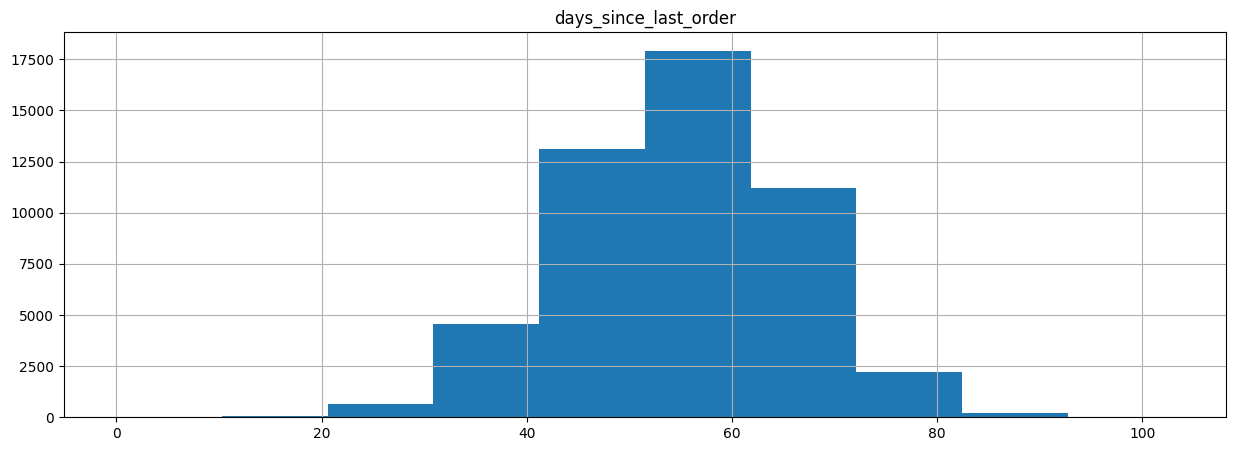

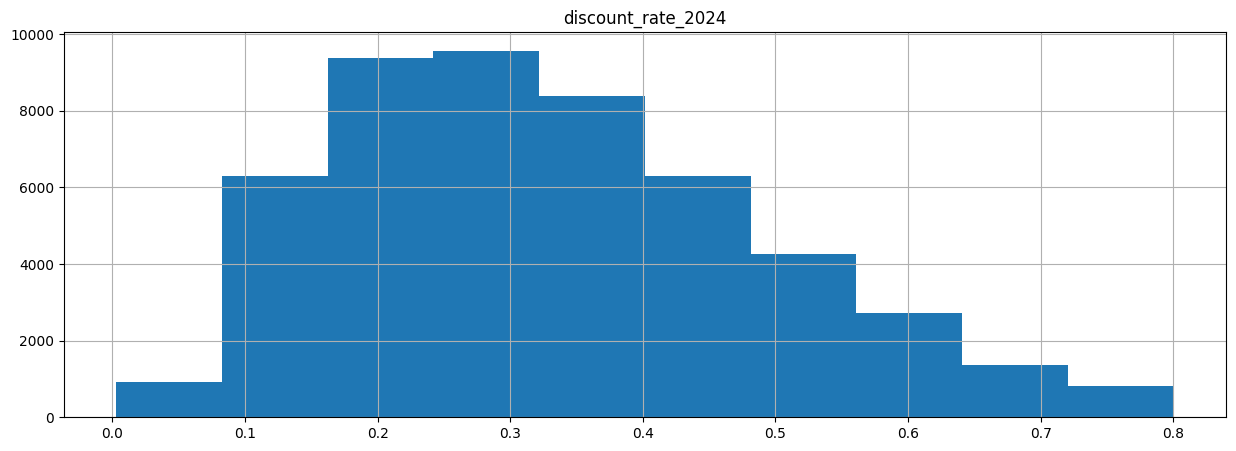

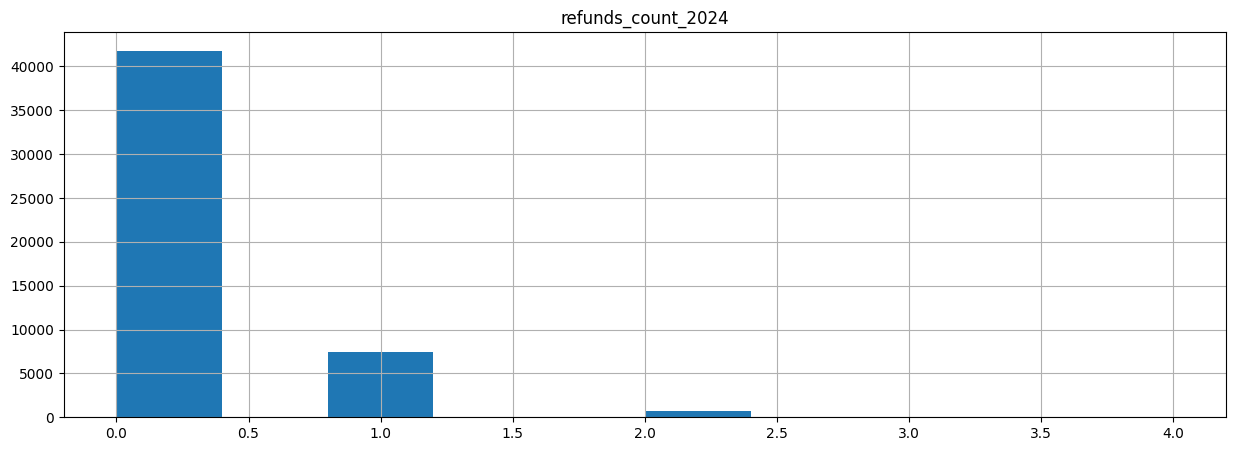

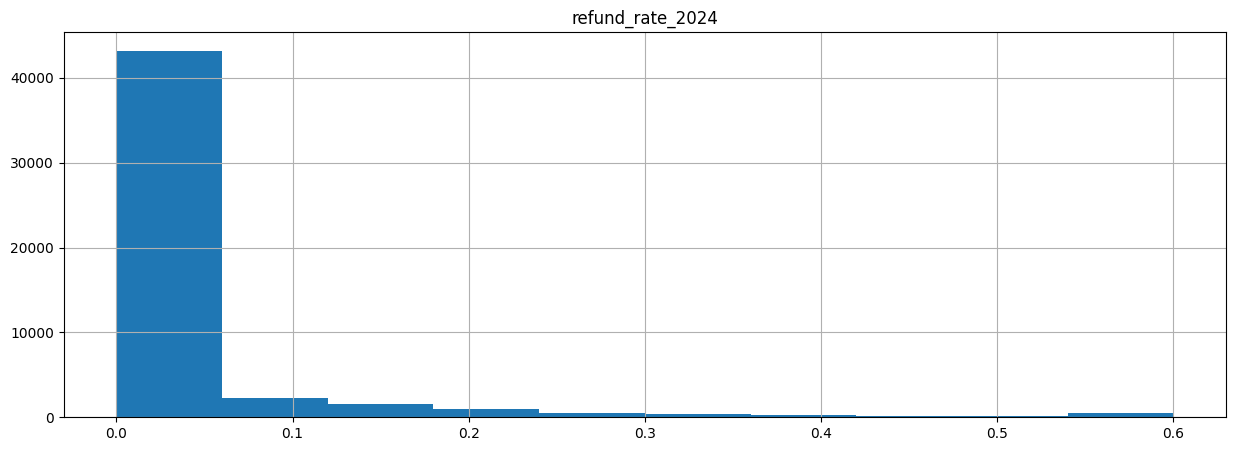

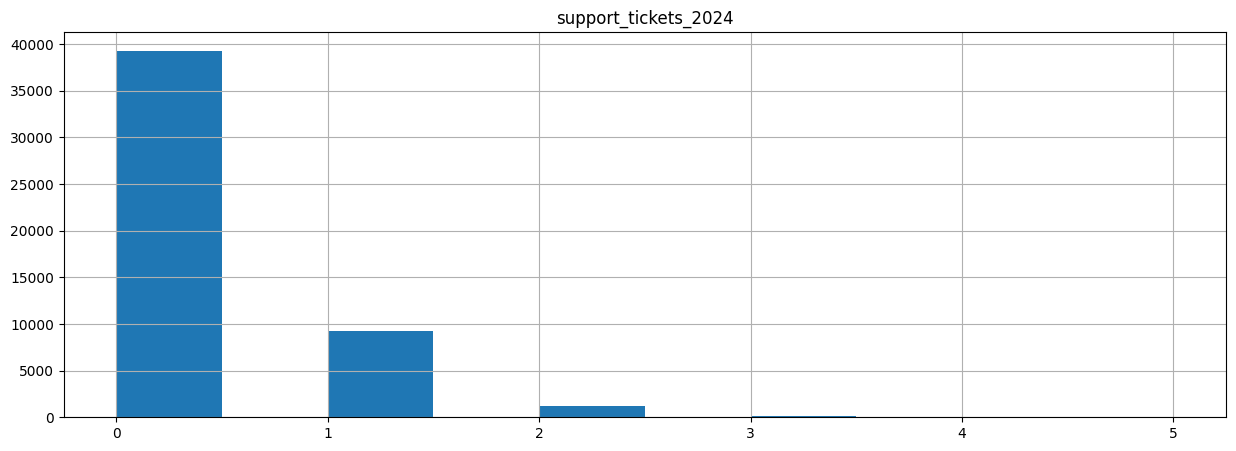

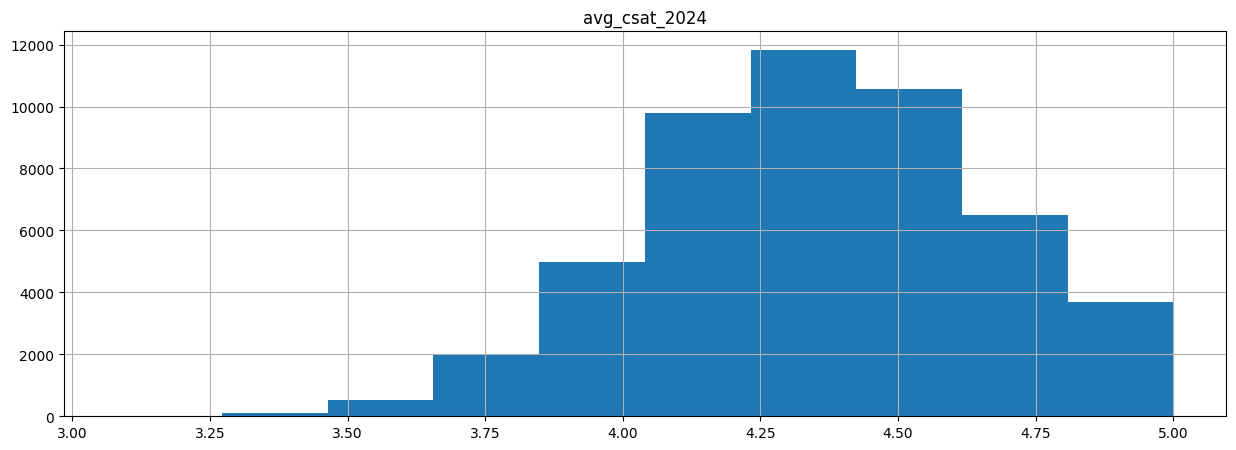

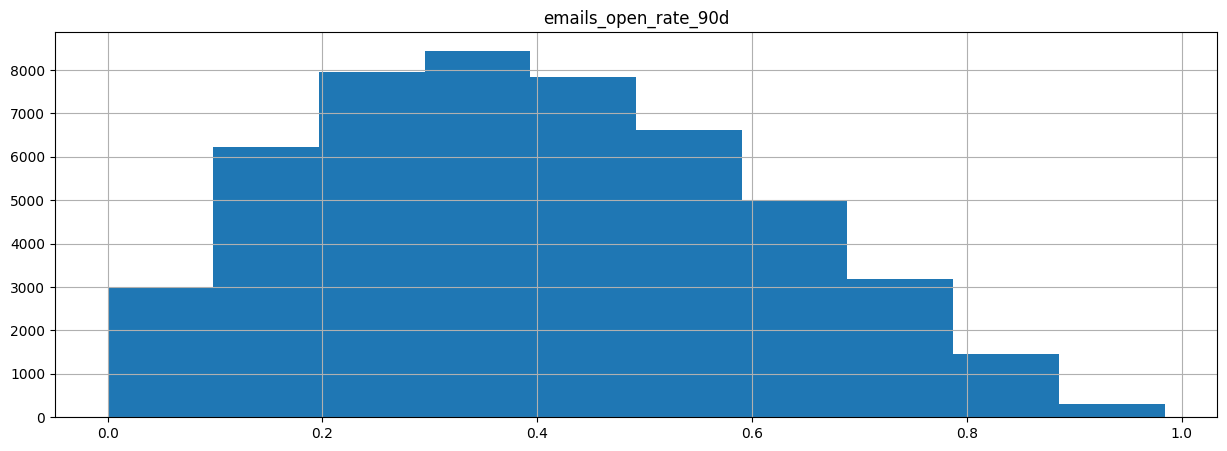

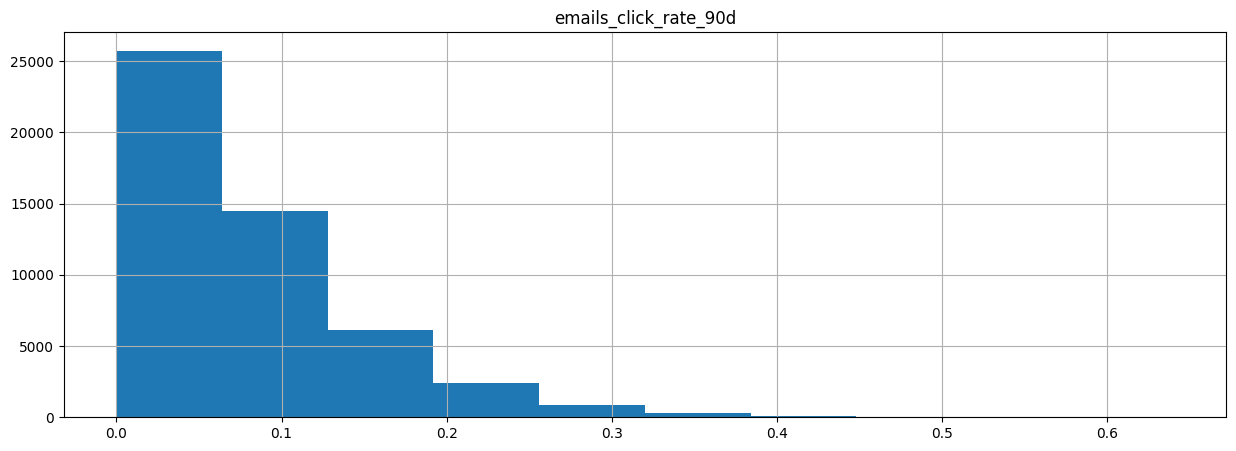

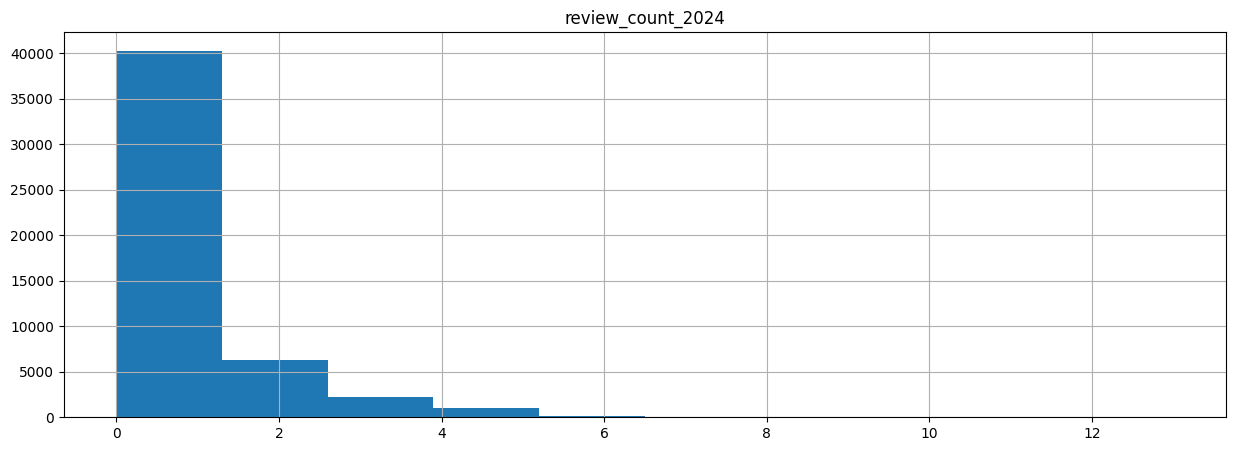

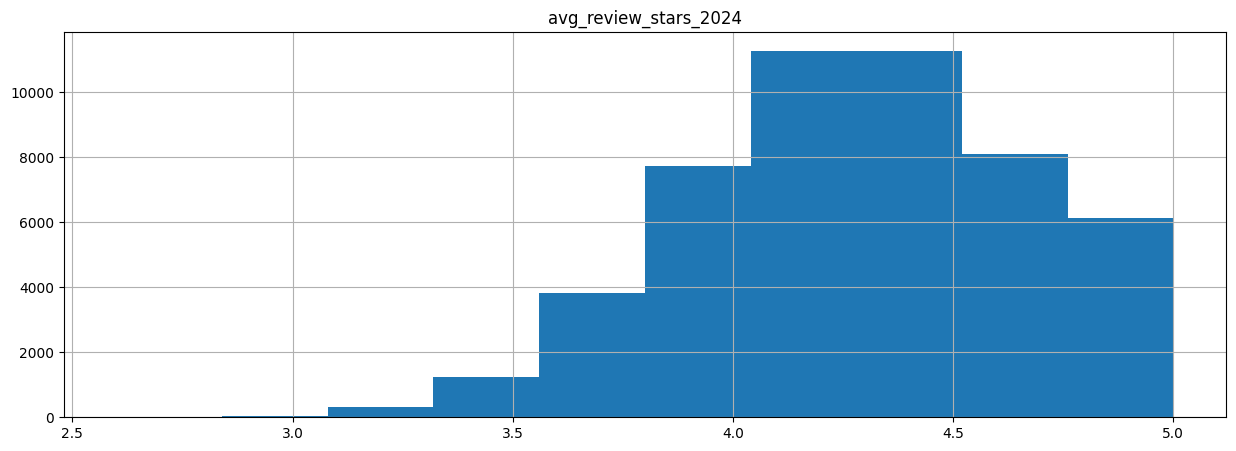

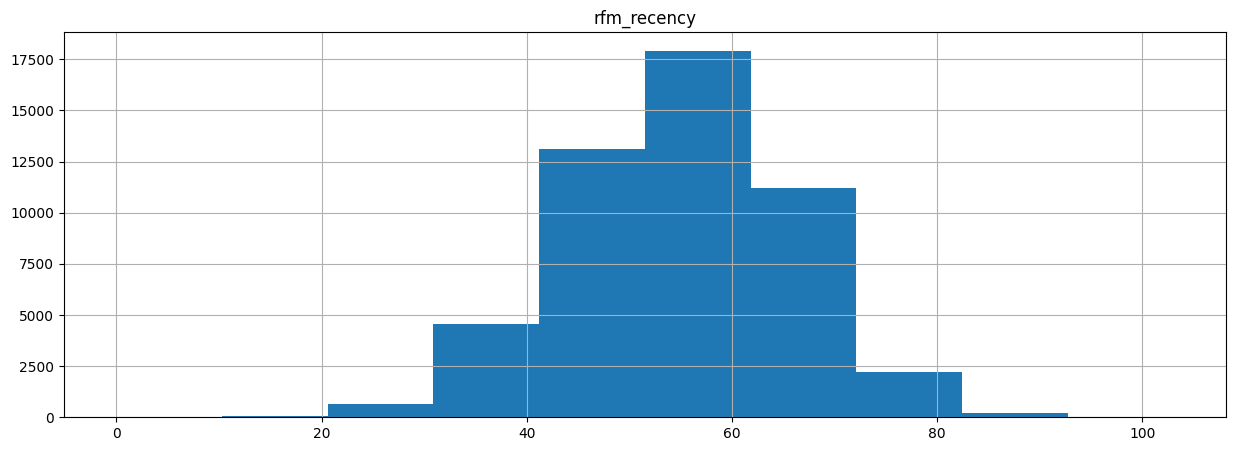

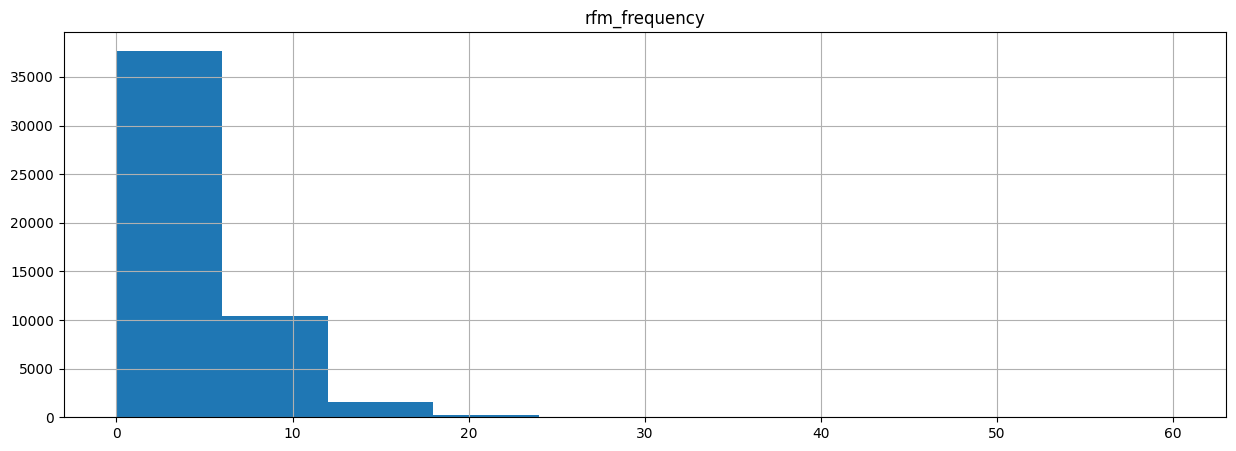

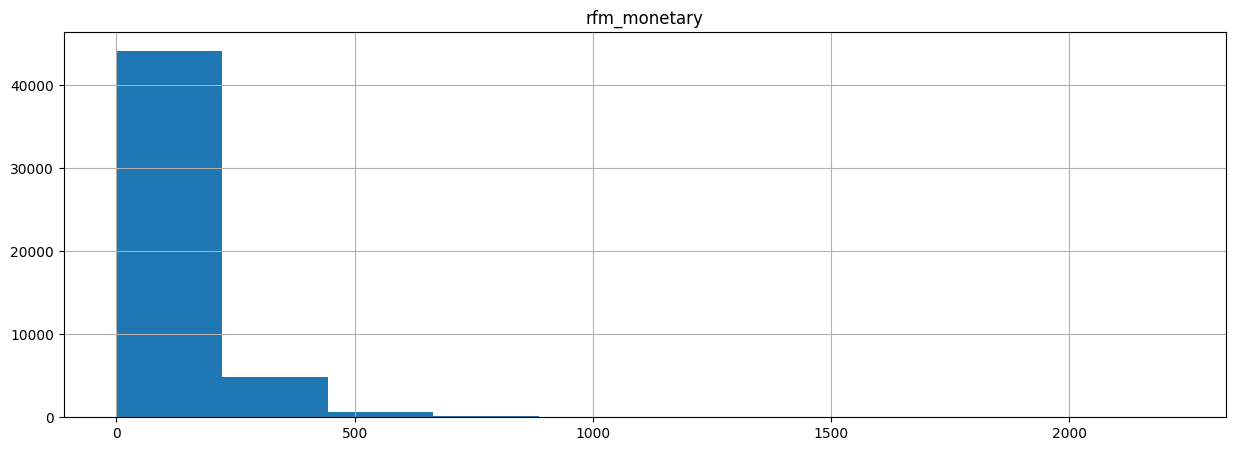

In [ ]:
for col in numerics_cols:
  df[col].hist(figsize=[15,5])
  plt.title(col)
  plt.show()

In [ ]:
for col in ['age', 'sessions_30d', 'orders_90d']:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


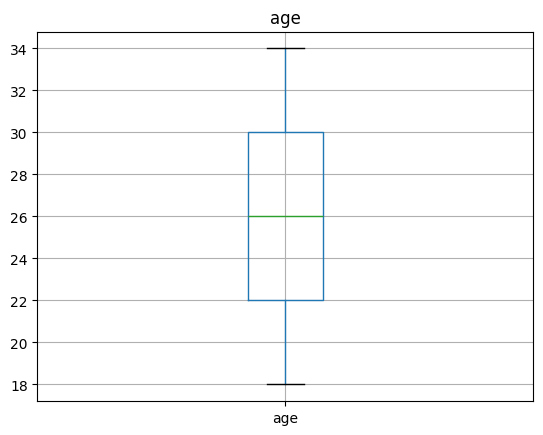

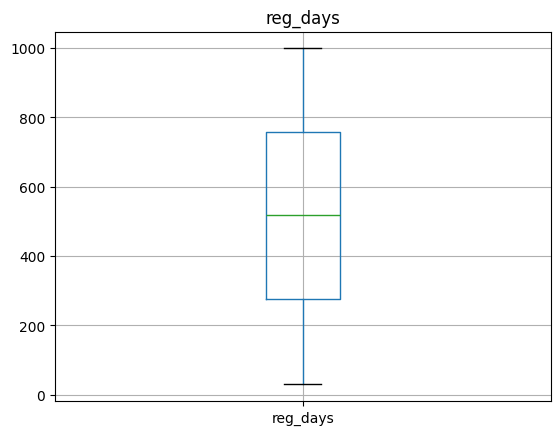

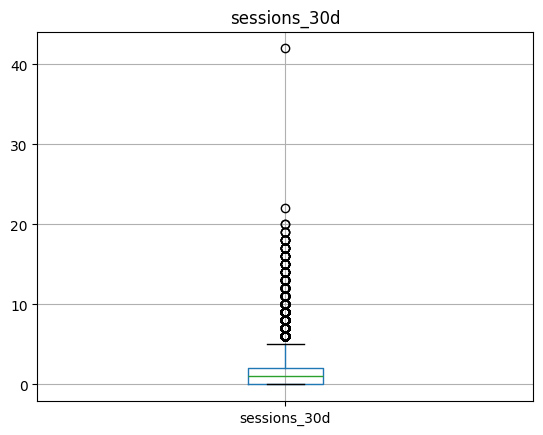

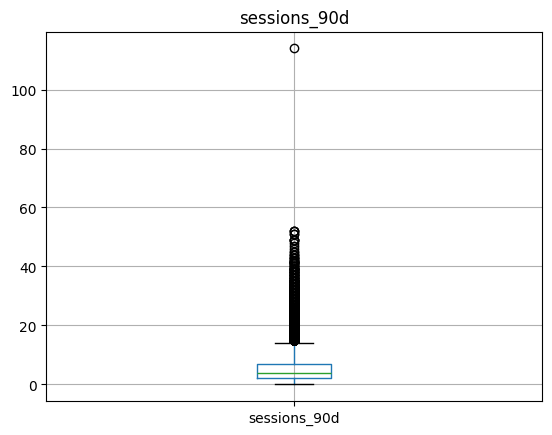

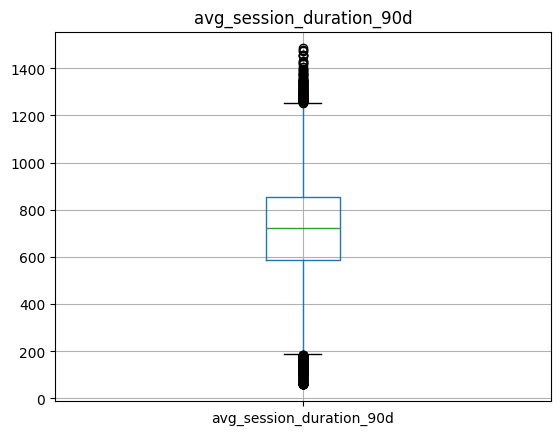

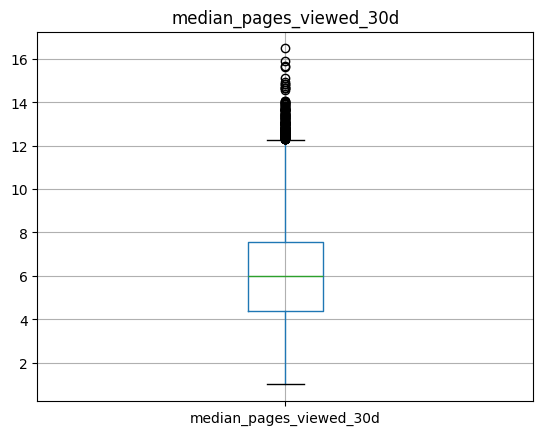

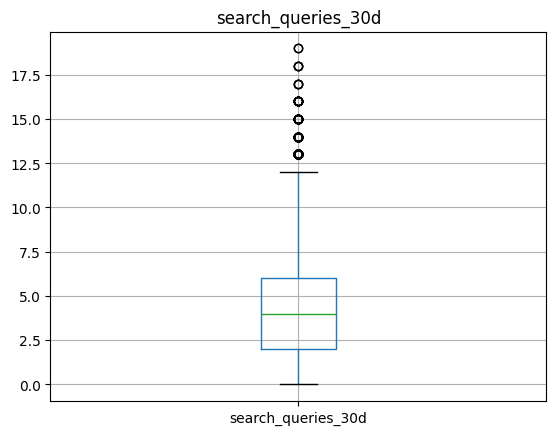

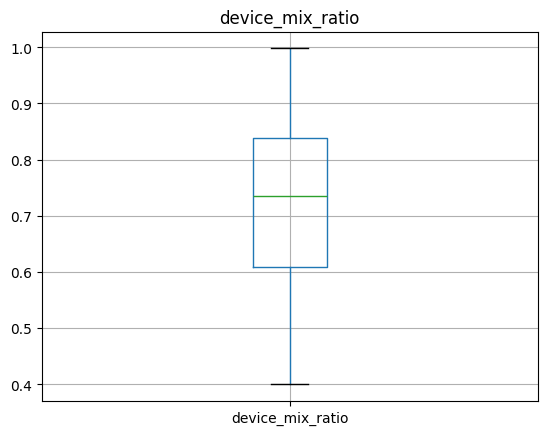

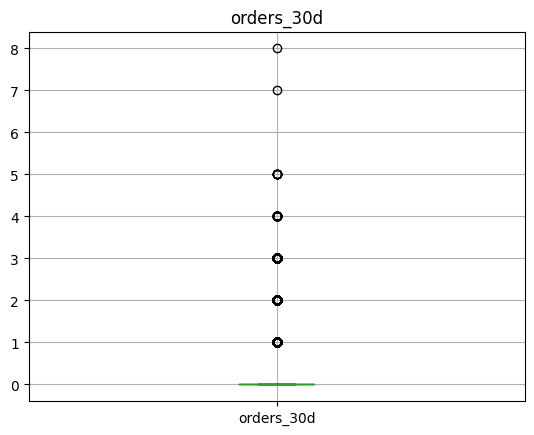

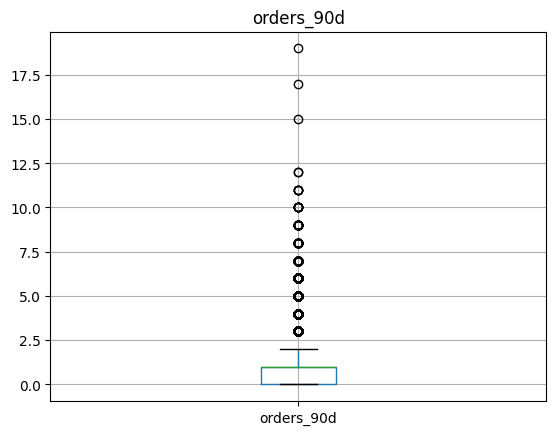

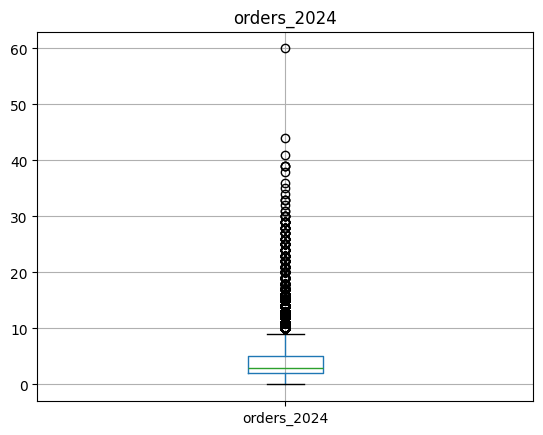

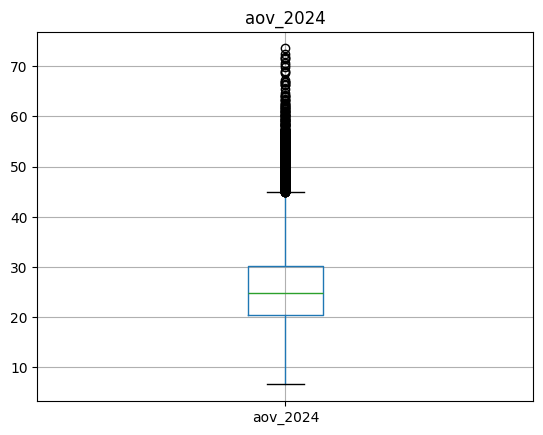

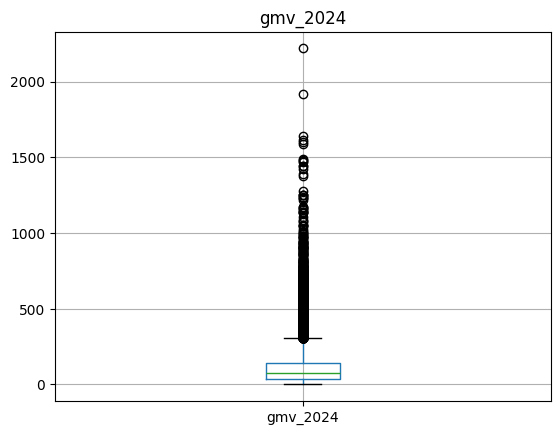

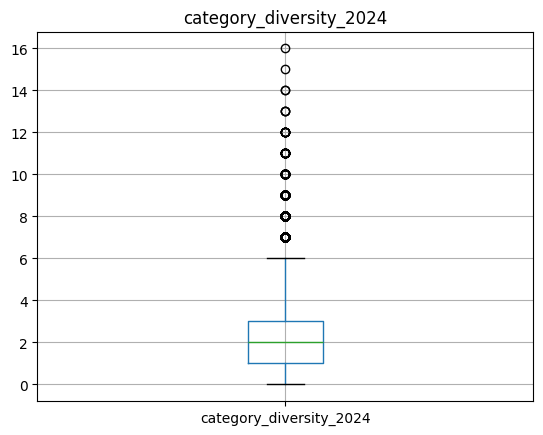

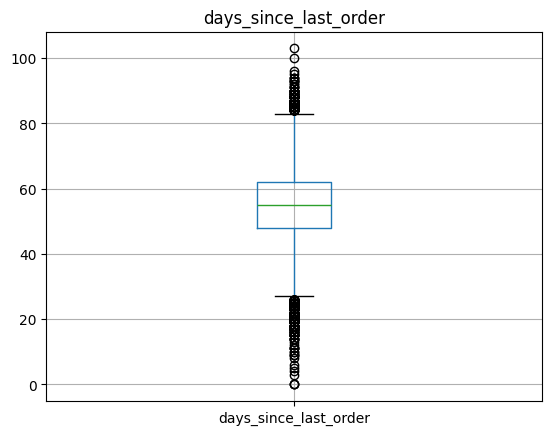

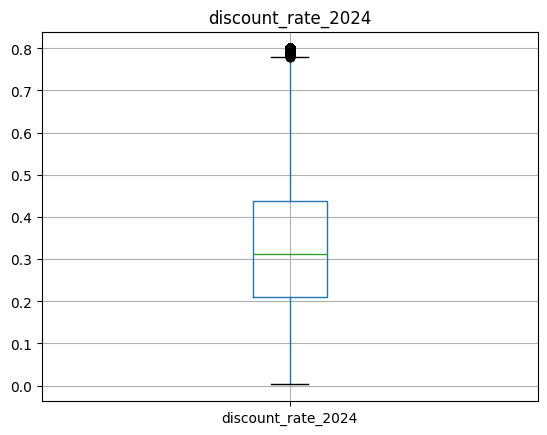

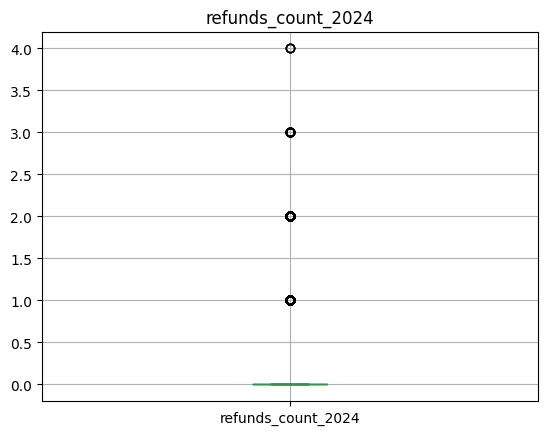

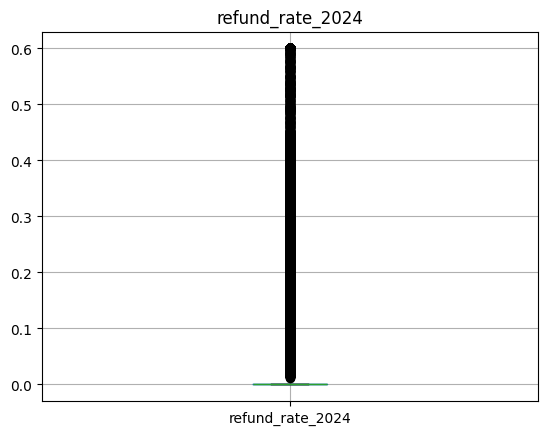

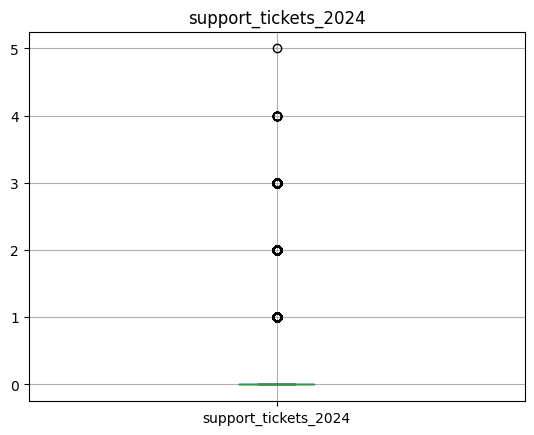

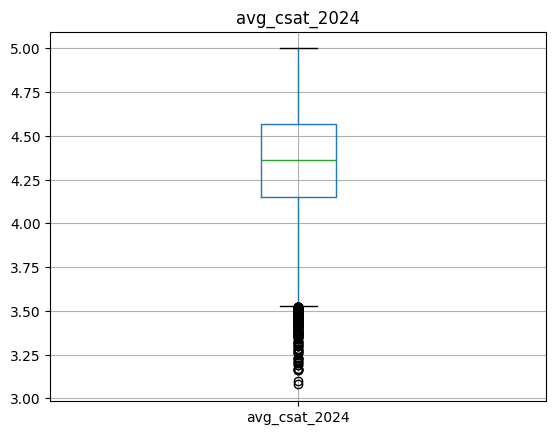

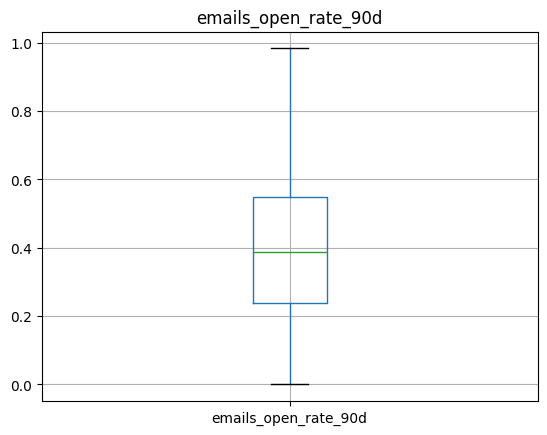

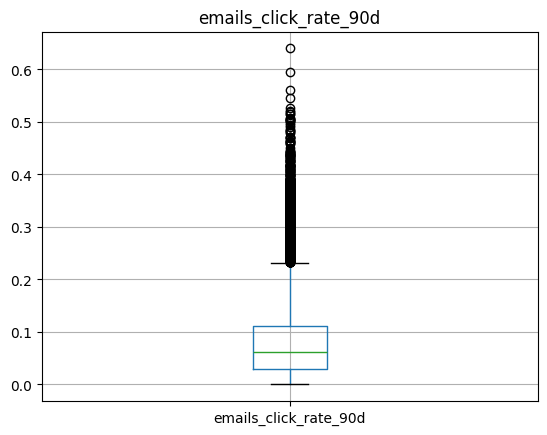

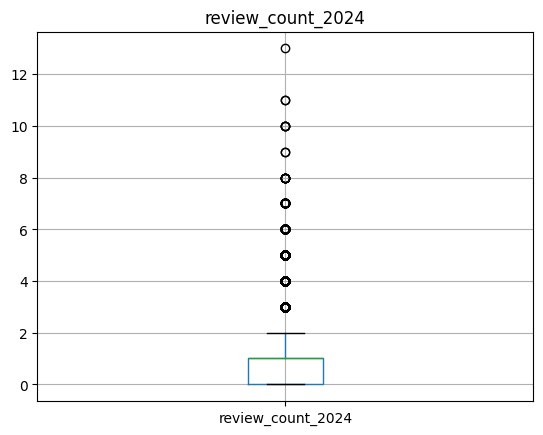

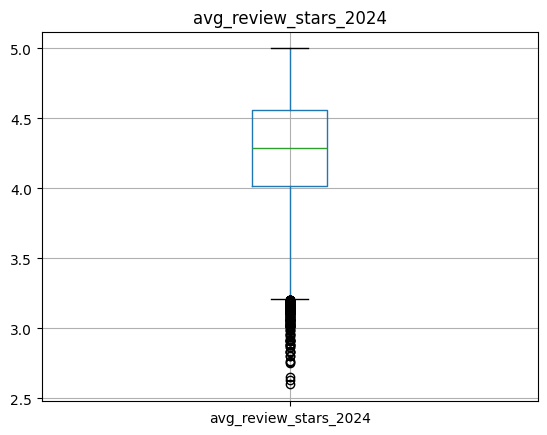

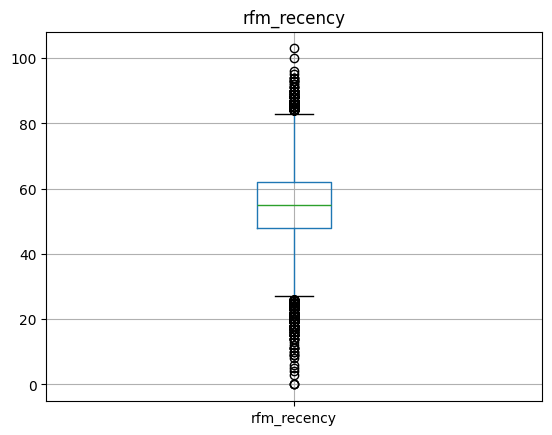

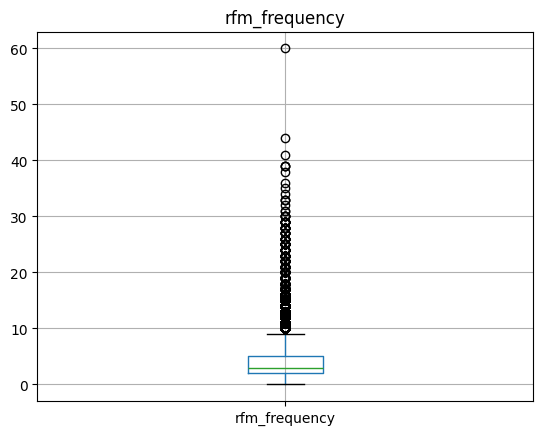

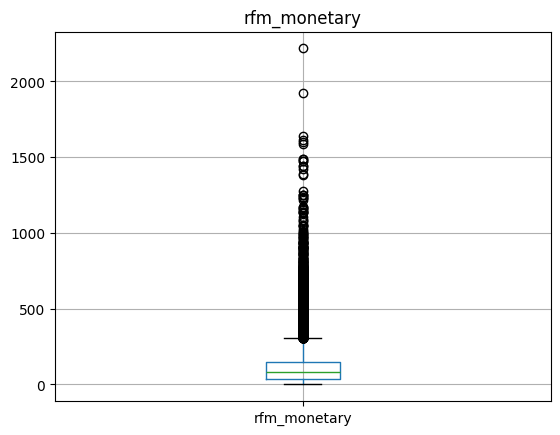

In [ ]:
for col in numerics_cols:
  df.boxplot(column=[col])
  plt.title(col)
  plt.show()

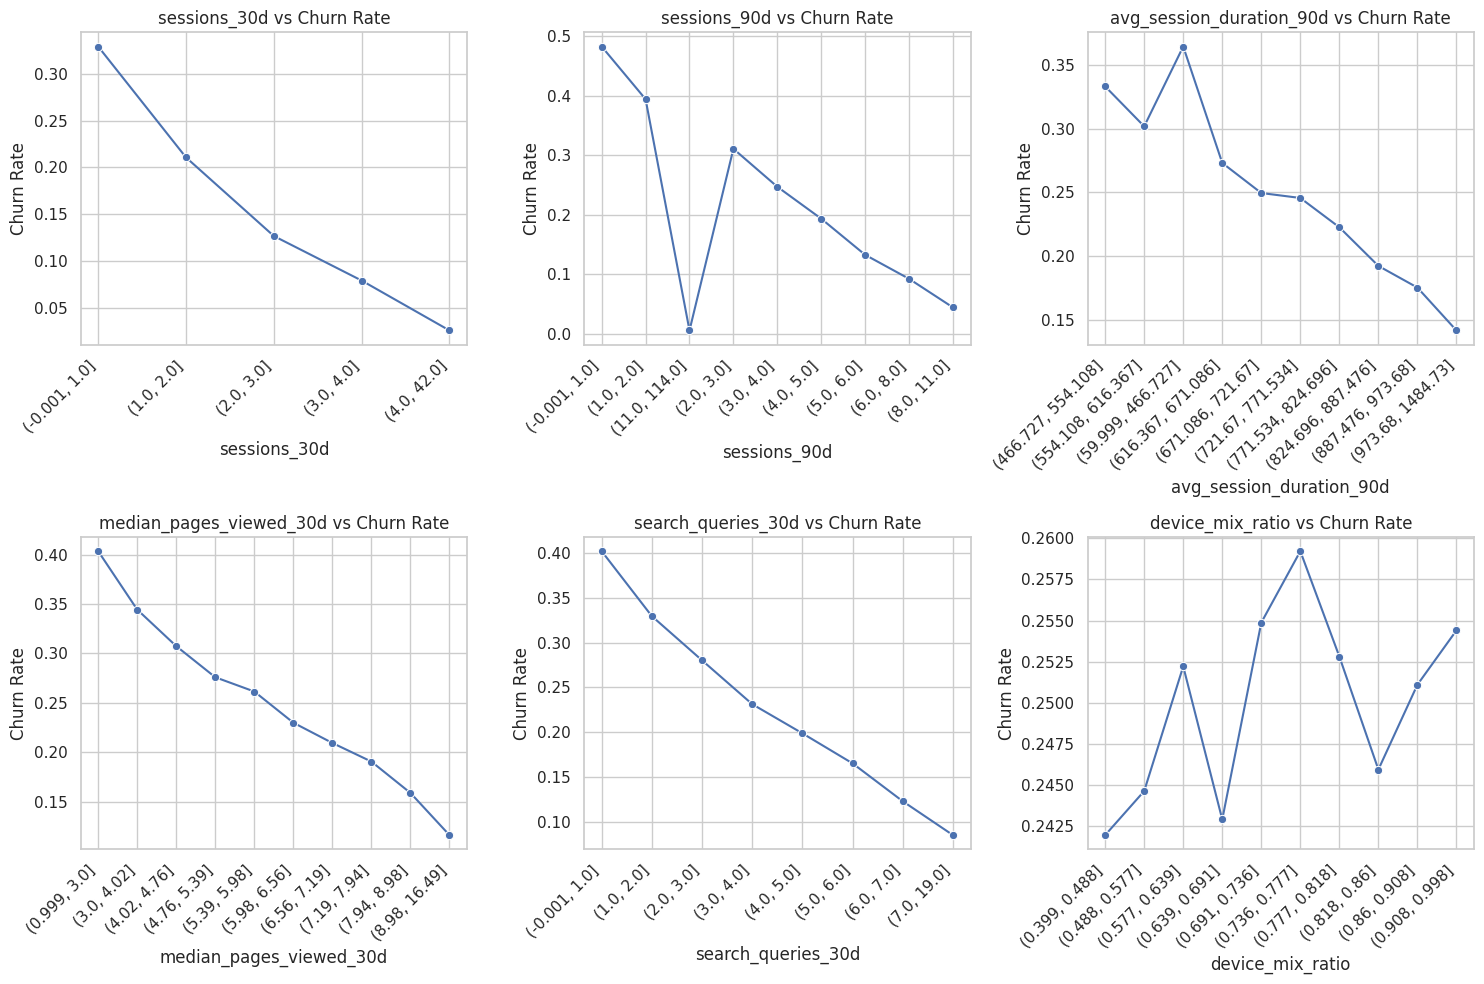

In [ ]:
# Example assumes df already loaded
activity_cols = [
    'sessions_30d', 'sessions_90d', 'avg_session_duration_90d',
    'median_pages_viewed_30d', 'search_queries_30d', 'device_mix_ratio'
]

# Style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Loop through each feature
for i, col in enumerate(activity_cols, 1):
    plt.subplot(2, 3, i)

    # Create bins (quantiles handle skewness well)
    # Convert the intervals to strings for plotting
    df[f'{col}_bin'] = pd.qcut(df[col], q=10, duplicates='drop').astype(str)


    # Calculate churn rate by bin
    churn_rate = df.groupby(f'{col}_bin')['churn_label'].mean().reset_index()

    # Plot as line (clear trend)
    sns.lineplot(data=churn_rate, x=f'{col}_bin', y='churn_label', marker='o')

    plt.title(f"{col} vs Churn Rate")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Churn Rate")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

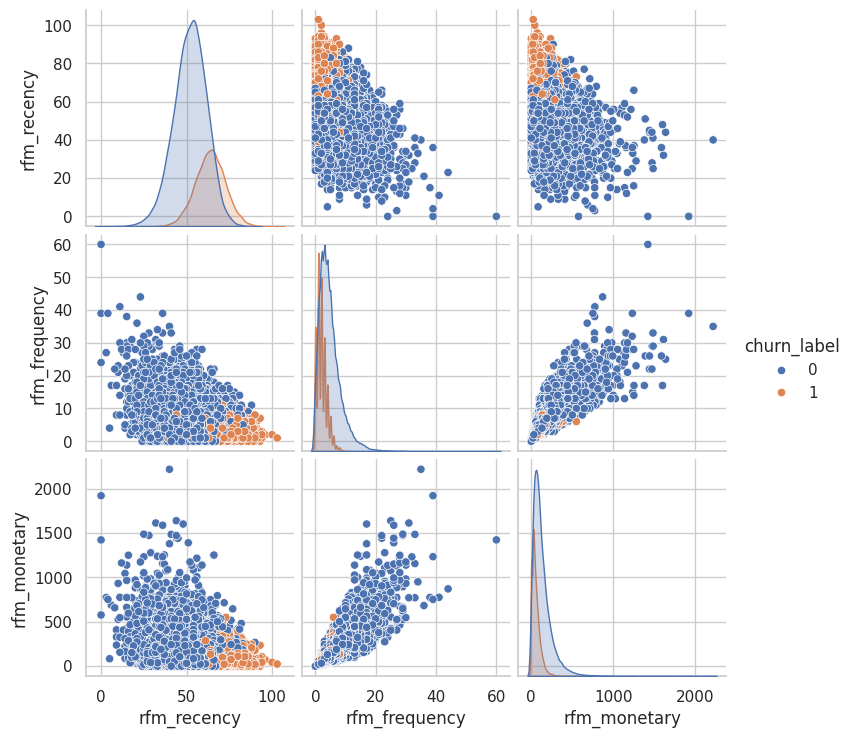

In [ ]:
sns.pairplot(df[['rfm_recency', 'rfm_frequency', 'rfm_monetary', 'churn_label']], hue='churn_label')


/tmp/ipython-input-1398735164.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(f'{col}_bin')['churn_label'].mean().reset_index()
/tmp/ipython-input-1398735164.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate['bin_center'] = df.groupby(f'{col}_bin')[col].mean().values  # for numeric x-axis
/tmp/ipython-input-1398735164.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_ra

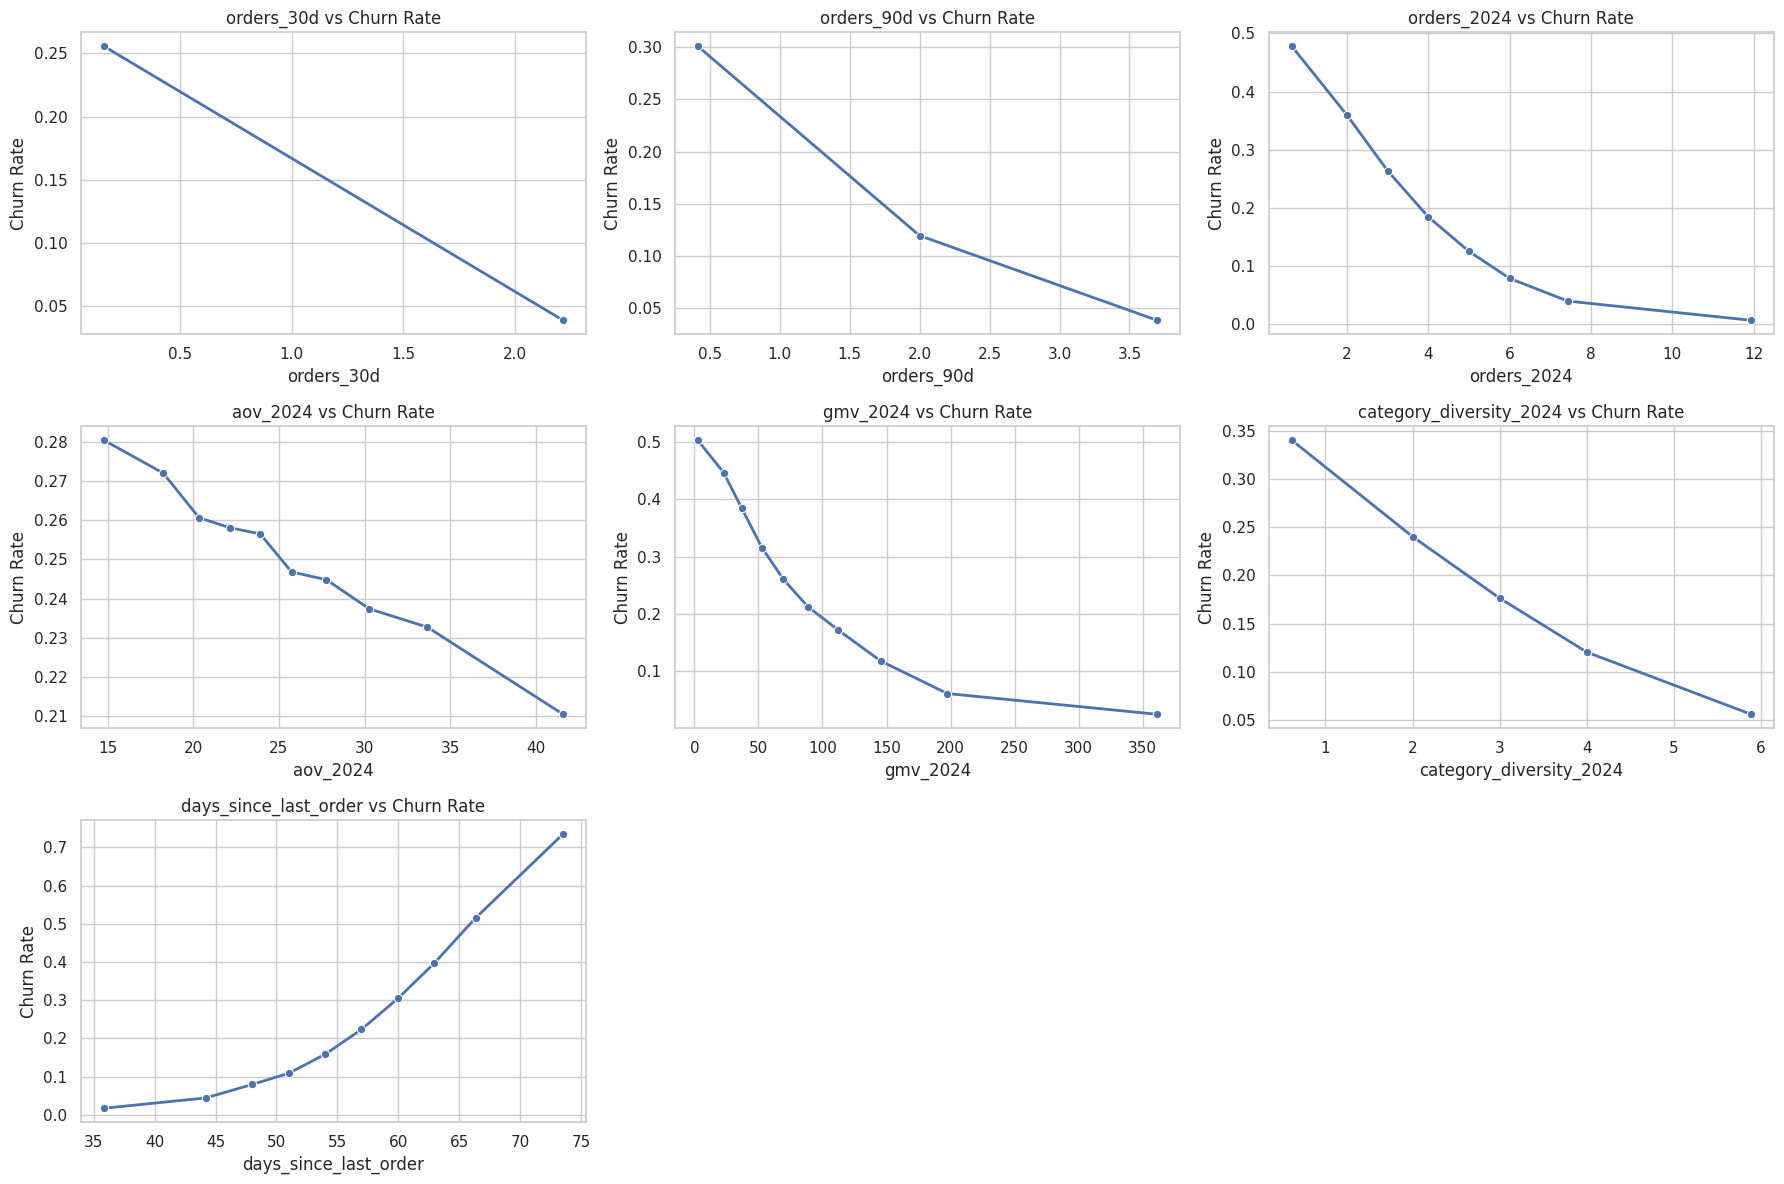

In [ ]:
txn_cols = [
    'orders_30d', 'orders_90d', 'orders_2024',
    'aov_2024', 'gmv_2024',
    'category_diversity_2024', 'days_since_last_order'
]

# Style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

for i, col in enumerate(txn_cols, 1):
    plt.subplot(3, 3, i)

    # Bin data into deciles (10 groups)
    df[f'{col}_bin'] = pd.qcut(df[col], q=10, duplicates='drop')

    # Compute churn rate by bin
    churn_rate = df.groupby(f'{col}_bin')['churn_label'].mean().reset_index()
    churn_rate['bin_center'] = df.groupby(f'{col}_bin')[col].mean().values  # for numeric x-axis

    # Line plot of churn rate vs feature value
    sns.lineplot(
        data=churn_rate,
        x='bin_center',
        y='churn_label',
        marker='o',
        linewidth=2
    )

    plt.title(f"{col} vs Churn Rate")
    plt.xlabel(col)
    plt.ylabel("Churn Rate")
    plt.grid(True)
    plt.tight_layout()

plt.show()

/tmp/ipython-input-3104473621.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(f'{col}_bin')['churn_label'].mean().reset_index()
/tmp/ipython-input-3104473621.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate['bin_center'] = df.groupby(f'{col}_bin')[col].mean().values
/tmp/ipython-input-3104473621.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(f'{col

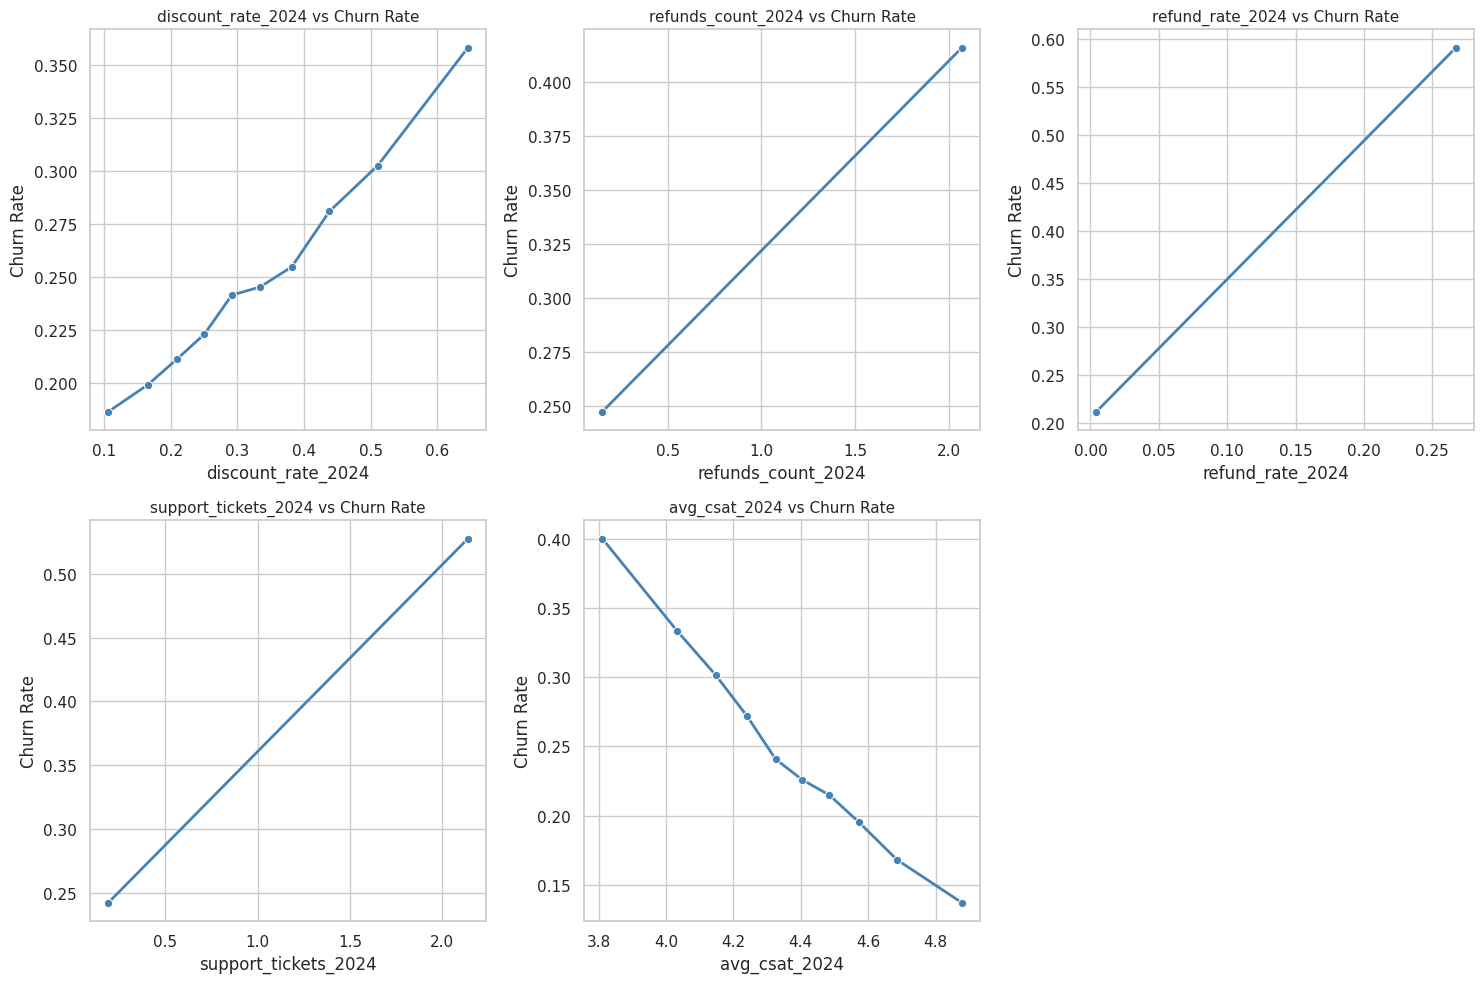

In [ ]:
exp_cols = [
    'discount_rate_2024', 'refunds_count_2024',
    'refund_rate_2024', 'support_tickets_2024',
    'avg_csat_2024'
]

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, col in enumerate(exp_cols, 1):
    plt.subplot(2, 3, i)

    # 1️⃣ Bin into quantiles (10 groups)
    df[f'{col}_bin'] = pd.qcut(df[col], q=10, duplicates='drop')

    # 2️⃣ Compute churn rate per bin
    churn_rate = df.groupby(f'{col}_bin')['churn_label'].mean().reset_index()
    churn_rate['bin_center'] = df.groupby(f'{col}_bin')[col].mean().values

    # 3️⃣ Plot churn rate as line chart
    sns.lineplot(
        data=churn_rate,
        x='bin_center',
        y='churn_label',
        marker='o',
        linewidth=2,
        color='steelblue'
    )

    plt.title(f"{col} vs Churn Rate", fontsize=11)
    plt.xlabel(col)
    plt.ylabel("Churn Rate")
    plt.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2414330540.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(f'{col}_bin')['churn_label'].mean().reset_index()
/tmp/ipython-input-2414330540.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate['bin_center'] = df.groupby(f'{col}_bin')[col].mean().values
/tmp/ipython-input-2414330540.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(f'{col

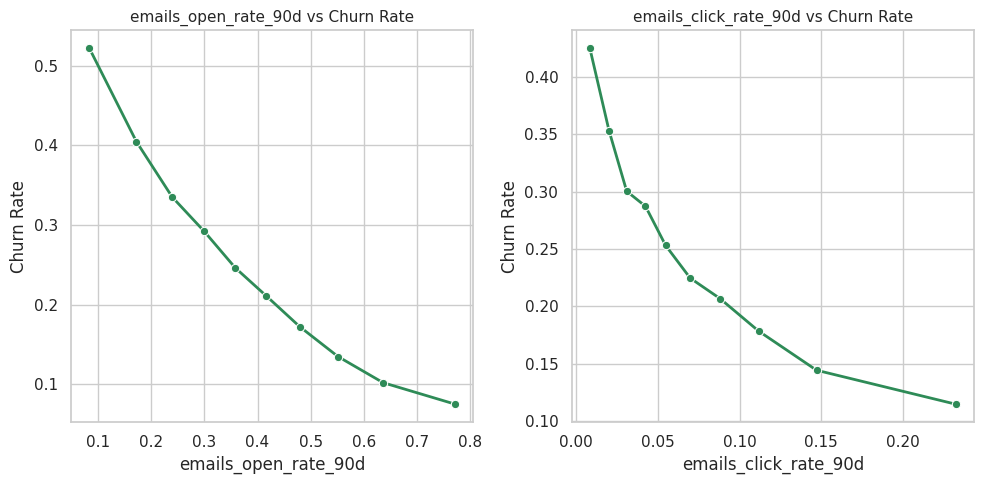

In [ ]:
email_cols = ['emails_open_rate_90d', 'emails_click_rate_90d']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

for i, col in enumerate(email_cols, 1):
    plt.subplot(1, 2, i)

    # 1️⃣ Bin into deciles (10 groups)
    df[f'{col}_bin'] = pd.qcut(df[col], q=10, duplicates='drop')

    # 2️⃣ Compute churn rate per bin
    churn_rate = df.groupby(f'{col}_bin')['churn_label'].mean().reset_index()
    churn_rate['bin_center'] = df.groupby(f'{col}_bin')[col].mean().values

    # 3️⃣ Line chart: churn vs feature
    sns.lineplot(
        data=churn_rate,
        x='bin_center',
        y='churn_label',
        marker='o',
        linewidth=2,
        color='seagreen'
    )

    plt.title(f"{col} vs Churn Rate", fontsize=11)
    plt.xlabel(col)
    plt.ylabel("Churn Rate")
    plt.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2218954019.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(f'{col}_bin')['churn_label'].mean().reset_index()
/tmp/ipython-input-2218954019.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate['bin_center'] = df.groupby(f'{col}_bin')[col].mean().values
/tmp/ipython-input-2218954019.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(f'{col

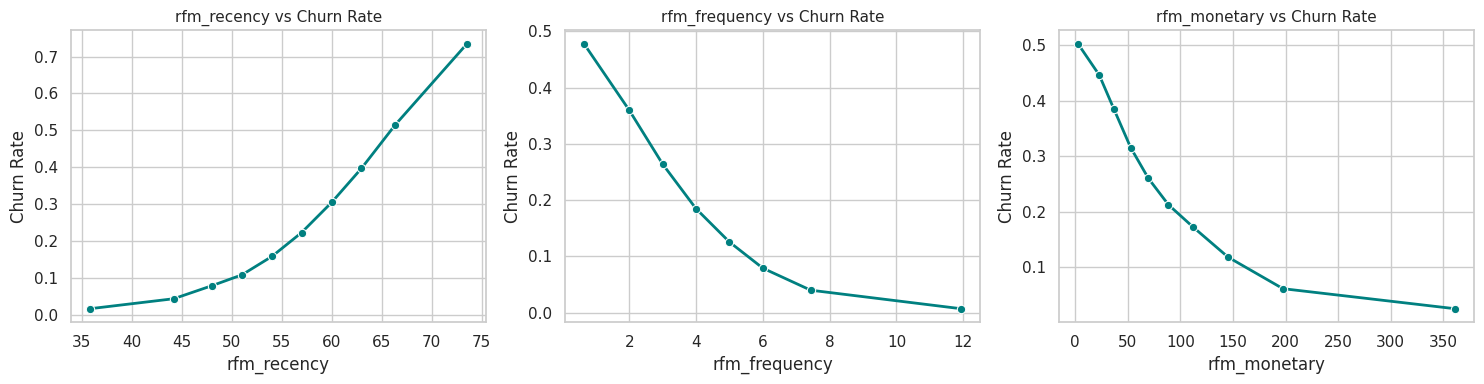

In [ ]:
rfm_cols = ['rfm_recency', 'rfm_frequency', 'rfm_monetary']

sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))

for i, col in enumerate(rfm_cols, 1):
    plt.subplot(1, 3, i)

    # 1️⃣ Bin feature into 10 quantiles
    df[f'{col}_bin'] = pd.qcut(df[col], q=10, duplicates='drop')

    # 2️⃣ Calculate churn rate for each bin
    churn_rate = df.groupby(f'{col}_bin')['churn_label'].mean().reset_index()
    churn_rate['bin_center'] = df.groupby(f'{col}_bin')[col].mean().values

    # 3️⃣ Plot churn rate as a line chart
    sns.lineplot(
        data=churn_rate,
        x='bin_center',
        y='churn_label',
        marker='o',
        linewidth=2,
        color='teal'
    )

    plt.title(f"{col} vs Churn Rate", fontsize=11)
    plt.xlabel(col)
    plt.ylabel("Churn Rate")
    plt.grid(True)

plt.tight_layout()
plt.show()

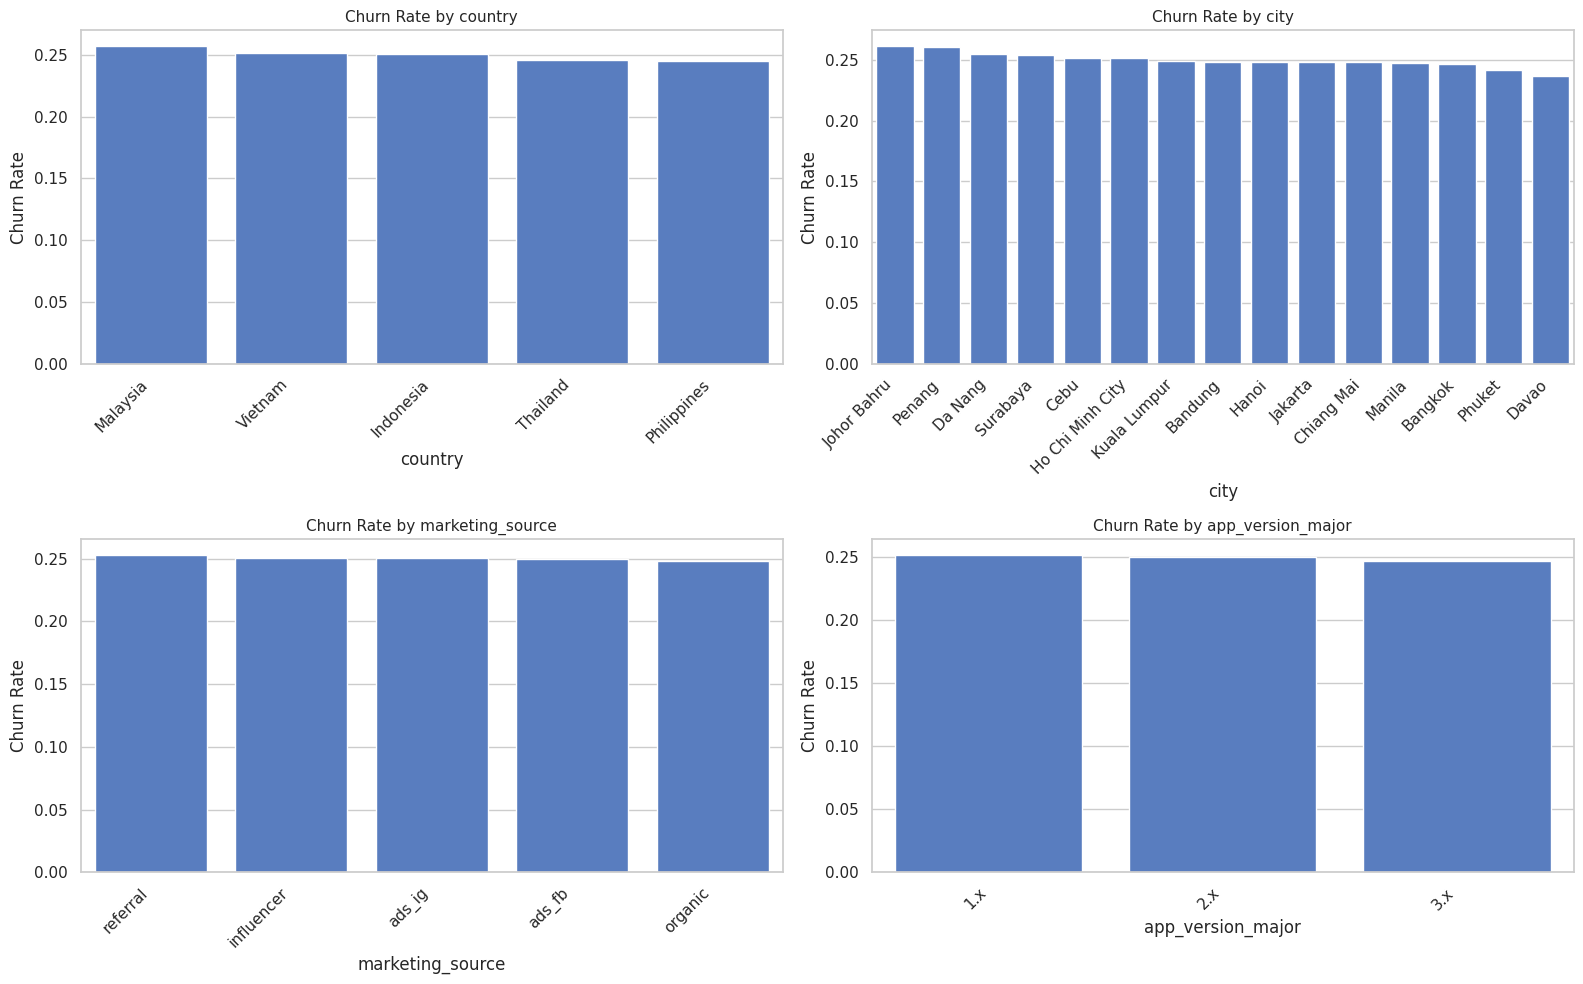

In [ ]:
cat_cols = ['country', 'city', 'marketing_source', 'app_version_major']

sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(16, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)

    # Compute churn rate per category
    churn_rate = (
        df.groupby(col)['churn_label']
        .mean()
        .sort_values(ascending=False)
        .reset_index()
    )

    # Plot
    sns.barplot(data=churn_rate, x=col, y='churn_label')
    plt.title(f"Churn Rate by {col}", fontsize=11)
    plt.ylabel("Churn Rate")
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

***Data preprocessing***

In [ ]:
dataset = df.copy()

In [ ]:
he = ce.HashingEncoder(cols='city')
dataset_hash = he.fit_transform(dataset)
dataset_hash

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,user_id,age,...,support_tickets_2024,avg_csat_2024,emails_open_rate_90d,emails_click_rate_90d,review_count_2024,avg_review_stars_2024,rfm_recency,rfm_frequency,rfm_monetary,churn_label
0,0,1,0,0,0,0,0,0,U40809,31,...,0,4.38,0.865,0.162,10,4.39,40,35,2218.36,0
1,0,0,1,0,0,0,0,0,U44697,33,...,2,4.23,0.518,0.058,6,4.22,0,39,1920.78,0
2,0,0,0,0,0,0,1,0,U02960,28,...,0,4.06,0.610,0.092,1,4.96,44,25,1638.85,0
3,0,0,0,0,0,0,1,0,U04535,27,...,1,3.79,0.400,0.090,3,4.31,32,31,1613.11,0
4,0,0,1,0,0,0,0,0,U35146,33,...,0,4.13,0.209,0.030,3,4.15,48,17,1601.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,0,0,0,0,0,0,U08338,29,...,0,3.50,0.236,0.110,1,3.89,69,0,0.00,1
49996,0,0,0,0,0,0,1,0,U48800,31,...,0,3.43,0.231,0.023,1,4.27,56,0,0.00,1
49997,0,0,0,0,0,0,1,0,U12279,31,...,1,3.42,0.073,0.021,0,4.20,70,0,0.00,1
49998,0,0,1,0,0,0,0,0,U46203,22,...,4,3.40,0.507,0.136,0,4.85,54,0,0.00,1


In [ ]:
dataset_hash_dummy = pd.get_dummies(dataset_hash,columns=['country','marketing_source','app_version_major'],dtype=int).drop(columns=['user_id'])
dataset_hash_dummy

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,age,reg_days,...,country_Thailand,country_Vietnam,marketing_source_ads_fb,marketing_source_ads_ig,marketing_source_influencer,marketing_source_organic,marketing_source_referral,app_version_major_1.x,app_version_major_2.x,app_version_major_3.x
0,0,1,0,0,0,0,0,0,31,261,...,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,33,810,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,28,148,...,0,1,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,1,0,27,868,...,1,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,33,437,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,0,0,0,0,0,0,29,365,...,0,0,0,0,0,1,0,1,0,0
49996,0,0,0,0,0,0,1,0,31,202,...,0,0,0,0,0,1,0,1,0,0
49997,0,0,0,0,0,0,1,0,31,296,...,0,0,0,1,0,0,0,0,1,0
49998,0,0,1,0,0,0,0,0,22,394,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
dataset_hash_dummy.select_dtypes(exclude=['number']).columns

Index(['sessions_30d_bin', 'sessions_90d_bin', 'avg_session_duration_90d_bin',
       'median_pages_viewed_30d_bin', 'search_queries_30d_bin',
       'device_mix_ratio_bin', 'orders_30d_bin', 'orders_90d_bin',
       'orders_2024_bin', 'aov_2024_bin', 'gmv_2024_bin',
       'category_diversity_2024_bin', 'days_since_last_order_bin',
       'discount_rate_2024_bin', 'refunds_count_2024_bin',
       'refund_rate_2024_bin', 'support_tickets_2024_bin', 'avg_csat_2024_bin',
       'emails_open_rate_90d_bin', 'emails_click_rate_90d_bin',
       'rfm_recency_bin', 'rfm_frequency_bin', 'rfm_monetary_bin'],
      dtype='object')

In [ ]:
bin_cols = [col for col in dataset_hash_dummy.columns if 'bin' in col.lower() or 'bins' in col.lower()]
dataset_hash_dummy = dataset_hash_dummy.drop(columns=bin_cols)
print(f"Deleted {len(bin_cols)} bin columns:", bin_cols)

Deleted 0 bin columns: []


In [ ]:
dataset_hash_dummy

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,age,reg_days,...,country_Thailand,country_Vietnam,marketing_source_ads_fb,marketing_source_ads_ig,marketing_source_influencer,marketing_source_organic,marketing_source_referral,app_version_major_1.x,app_version_major_2.x,app_version_major_3.x
0,0,1,0,0,0,0,0,0,31,261,...,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,33,810,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,28,148,...,0,1,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,1,0,27,868,...,1,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,33,437,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,0,0,0,0,0,0,29,365,...,0,0,0,0,0,1,0,1,0,0
49996,0,0,0,0,0,0,1,0,31,202,...,0,0,0,0,0,1,0,1,0,0
49997,0,0,0,0,0,0,1,0,31,296,...,0,0,0,1,0,0,0,0,1,0
49998,0,0,1,0,0,0,0,0,22,394,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
correlation = dataset_hash_dummy.corr()
correlation.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.12/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,age,reg_days,sessions_30d,sessions_90d,avg_session_duration_90d,median_pages_viewed_30d,search_queries_30d,device_mix_ratio,orders_30d,orders_90d,orders_2024,aov_2024,gmv_2024,category_diversity_2024,days_since_last_order,discount_rate_2024,refunds_count_2024,refund_rate_2024,support_tickets_2024,avg_csat_2024,emails_open_rate_90d,emails_click_rate_90d,review_count_2024,avg_review_stars_2024,rfm_recency,rfm_frequency,rfm_monetary,churn_label,country_Indonesia,country_Malaysia,country_Philippines,country_Thailand,country_Vietnam,marketing_source_ads_fb,marketing_source_ads_ig,marketing_source_influencer,marketing_source_organic,marketing_source_referral,app_version_major_1.x,app_version_major_2.x,app_version_major_3.x
col_0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
col_1,nan,1.000000,-0.502488,nan,nan,nan,-0.496557,nan,-0.000910,-0.001930,0.000436,-0.003502,-0.003006,-0.003398,-0.003421,0.003689,-0.003457,-0.003883,0.001993,-0.000516,0.001620,0.003169,-0.001722,-0.004551,0.000697,0.001388,0.001295,0.001251,-0.002721,0.001163,-0.003350,-0.002623,-0.001722,0.001993,0.001620,-0.001275,-0.001930,-0.004124,-0.000754,-0.005805,0.011668,-0.006302,0.000487,-0.000951,0.002461,0.003366,0.003333,-0.005184,0.002647
col_2,nan,-0.502488,1.000000,nan,nan,nan,-0.500949,nan,-0.005989,0.003940,0.000135,0.003573,-0.001765,-0.000712,-0.004516,-0.002715,0.006682,0.000578,0.001126,0.002808,0.000843,0.001058,-0.002495,0.007135,0.002638,-0.000060,-0.001556,-0.000715,0.000837,-0.003819,-0.000192,-0.004883,-0.002495,0.001126,0.000843,-0.003519,-0.003501,-0.003557,0.006712,0.007094,-0.005572,0.001772,-0.002134,0.002688,-0.001805,0.000541,0.002305,0.003827,-0.006739
col_3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
col_4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
col_5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
col_6,nan,-0.496557,-0.500949,nan,nan,nan,1.000000,nan,0.006923,-0.002023,-0.000572,-0.000082,0.004781,0.004116,0.007958,-0.000968,-0.003248,0.003307,-0.003126,-0.002303,-0.002468,-0.004235,0.004228,-0.002607,-0.003346,-0.001329,0.000266,-0.000534,0.001884,0.002670,0.003546,0.007528,0.004228,-0.003126,-0.002468,0.004809,0.005447,0.007699,-0.005984,-0.001311,-0.006086,0.004529,0.001654,-0.001746,-0.000651,-0.003912,-0.005650,0.001348,0.004117
col_7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,nan,-0.000910,-0.005989,nan,nan,nan,0.006923,nan,1.000000,0.000828,-0.001924,-0.000093,-0.001025,0.003714,0.002592,0.002489,0.003520,0.003792,-0.000582,-0.004750,-0.002579,0.004063,0.003091,-0.004442,0.001951,0.002812,0.000152,0.001719,-0.011012,-0.007236,-0.001424,-0.004793,0.003091,-0.000582,-0.002579,0.003848,0.005567,-0.008261,-0.000849,0.005361,-0.002773,0.000791,-0.001550,-0.001905,0.002456,-0.001153,0.001599,-0.002522,0.001310
reg_days,nan,-0.001930,0.003940,nan,nan,nan,-0.002023,nan,0.000828,1.000000,-0.002558,-0.000428,0.002334,-0.000356,0.001086,0.001166,0.009594,-0.002929,-0.005241,0.001409,-0.002435,-0.008360,-0.001218,-0.004644,-0.008135,-0.005705,0.002422,-0.001360,0.002296,-0.002485,-0.002504,-0.003742,-0.001218,-0.005241,-0.002435,-0.005128,0.004678,-0.005006,-0.001656,0.002152,-0.001070,-0.004401,0.002744,-0.004812,0.002046,0.002969,-0.003519,-

In [ ]:
corr_matrix = dataset_hash_dummy.corr().abs()


In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
print("Highly correlated features:", to_drop)

Highly correlated features: ['sessions_90d', 'orders_2024', 'gmv_2024', 'refund_rate_2024', 'emails_click_rate_90d', 'rfm_recency', 'rfm_frequency', 'rfm_monetary']


In [ ]:
dataset_cleaned = dataset_hash_dummy.drop(columns=to_drop)

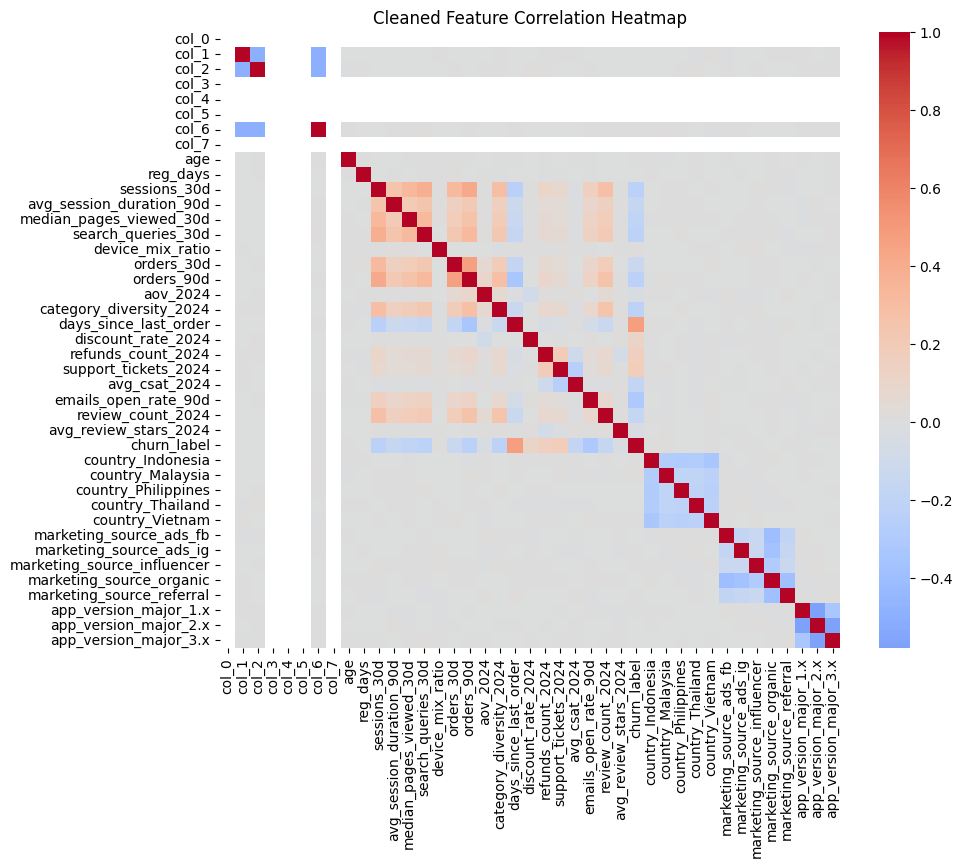

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset_cleaned.corr(), cmap='coolwarm', center=0)
plt.title("Cleaned Feature Correlation Heatmap")
plt.show()

**training**

exp1: upsampling = SMOTE,scaling = RobustScaler, logistic regression

In [ ]:
X= dataset_cleaned.drop(columns=['churn_label'],axis=1)
y= dataset_cleaned['churn_label']

X_train,X_test = train_test_split(X,test_size=0.2,random_state=42)
y_train,y_test = train_test_split(y,test_size=0.2,random_state=42)
#upsampling = SMOTE
smote = SMOTE(k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#listing the columns scaled
columns_scaled = ['age','reg_days', 'sessions_30d','avg_session_duration_90d',
                  'median_pages_viewed_30d', 'search_queries_30d',
                  'orders_30d', 'orders_90d', 'aov_2024',
                  'category_diversity_2024', 'days_since_last_order',
                  'refunds_count_2024','support_tickets_2024', 'avg_csat_2024',
                 'review_count_2024', 'avg_review_stars_2024']
#scaling = RobustScaler
scaler = RobustScaler()
# Fit-transform training set, transform test set
X_train_resampled_scaled = X_train_resampled.copy()
X_test_scaled = X_test.copy()

X_train_resampled_scaled[columns_scaled] = scaler.fit_transform(X_train_resampled[columns_scaled])
X_test_scaled[columns_scaled] = scaler.transform(X_test[columns_scaled])

X_train_resampled_scaled

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,age,reg_days,...,country_Thailand,country_Vietnam,marketing_source_ads_fb,marketing_source_ads_ig,marketing_source_influencer,marketing_source_organic,marketing_source_referral,app_version_major_1.x,app_version_major_2.x,app_version_major_3.x
0,0,1,0,0,0,0,0,0,-0.250,0.094262,...,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,1.000,-0.161885,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0.125,-0.766393,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,-0.750,0.327869,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0.250,0.731557,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60021,0,1,0,0,0,0,0,0,0.875,-0.967213,...,0,0,0,0,0,0,0,0,1,0
60022,0,0,0,0,0,0,0,0,0.750,0.811475,...,0,0,0,0,0,0,0,0,1,0
60023,0,0,1,0,0,0,0,0,0.125,0.161885,...,0,0,0,0,0,1,0,0,0,1
60024,0,0,0,0,0,0,0,0,-0.375,0.122951,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
#logistic regression
model_log = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight=None)
model_log.fit(X_train_resampled_scaled, y_train_resampled)

# ---  Evaluate performance ---
y_pred = model_log.predict(X_test_scaled)
y_prob = model_log.predict_proba(X_test_scaled)[:, 1]
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))



Confusion Matrix:
 [[7123  364]
 [ 582 1931]]

Classification Report:
               precision    recall  f1-score   support

           0      0.924     0.951     0.938      7487
           1      0.841     0.768     0.803      2513

    accuracy                          0.905     10000
   macro avg      0.883     0.860     0.870     10000
weighted avg      0.904     0.905     0.904     10000


ROC AUC Score: 0.9577107017331169


exp2: XGBOOST, no scaling,sampling

In [ ]:
X= dataset_cleaned.drop(columns=['churn_label'],axis=1)
y= dataset_cleaned['churn_label']

X_train,X_test = train_test_split(X,test_size=0.2,random_state=42)
y_train,y_test = train_test_split(y,test_size=0.2,random_state=42)

In [ ]:
#xgboost
import xgboost as xgb
model_xg = xgb.XGBClassifier(random_state=42)
model_xg.fit(X_train, y_train)

y_pred = model_xg.predict(X_test)
y_prob = model_xg.predict_proba(X_test)[:, 1]
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))



Confusion Matrix:
 [[7058  429]
 [ 605 1908]]

Classification Report:
               precision    recall  f1-score   support

           0      0.921     0.943     0.932      7487
           1      0.816     0.759     0.787      2513

    accuracy                          0.897     10000
   macro avg      0.869     0.851     0.859     10000
weighted avg      0.895     0.897     0.895     10000


ROC AUC Score: 0.9554354753438923
